In [249]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


# Load the uploaded CSV file to check its structure
file_path = 'shanghai-air-quality.csv'
data = pd.read_csv(file_path)
data.head()

date   pm25  pm10  o3  no2  so2  co
0  2014/1/1    188    92  39   54   17  13
1  2014/1/2    170   105  21   55   32  12
2  2014/1/3    191    94  18   36   19   9
3  2014/1/4    176    53  13   37   13   7
4  2014/1/5    116    36  28   28   10   7

In [250]:
# Strip whitespace from all columns and replace empty strings with NaN, then drop rows with any NaNs
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data['year_month'] = data['date'].dt.to_period('M')
clean_data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
clean_data.columns = clean_data.columns.str.strip()
clean_data.replace('', pd.NA, inplace=True)
clean_data.dropna(subset=['pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], inplace=True)

# Convert pollutants to float for accurate calculations
clean_data[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']] = clean_data[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].astype(float)

# Group by the new year_month column and calculate the mean for each pollutant
monthly_avg = clean_data.groupby('year_month').mean().reset_index()

# Save the new DataFrame to a CSV file


In [251]:
# Strip whitespace from all columns and replace empty strings with NaN, then drop rows with any NaNs
data.drop(columns=' o3', inplace=True)
clean_data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
clean_data.columns = clean_data.columns.str.strip()
clean_data.replace('', pd.NA, inplace=True)
clean_data.dropna(subset=['pm25', 'pm10', 'no2', 'so2', 'co'], inplace=True)

# Convert pollutants to float for accurate calculations
clean_data[['pm25', 'pm10', 'no2', 'so2', 'co']] = clean_data[['pm25', 'pm10','no2', 'so2', 'co']].astype(float)

# Group by the new year_month column and calculate the mean for each pollutant
monthly_avgs = clean_data.groupby('year_month').mean().reset_index()

# Save the new DataFrame to a CSV file
output_path = 'monthly_air_quality_averagess.csv'
monthly_avgs.to_csv(output_path, index=False)

monthly_avgs.head(), output_path

(  year_month        pm25       pm10        no2        so2        co
 0    2014-01  139.709677  66.387097  27.612903  13.677419  7.354839
 1    2014-02  117.285714  46.285714  19.035714   7.785714  5.857143
 2    2014-03  126.806452  62.258065  27.225806   8.741935  5.548387
 3    2014-04  125.100000  56.366667  24.600000   5.800000  5.033333
 4    2014-05  135.580645  71.451613  21.967742   6.129032  5.612903,
 'monthly_air_quality_averagess.csv')

In [252]:
monthly_avg[['pm25', 'pm10', 'no2', 'so2', 'co']] = monthly_avgs[['pm25', 'pm10', 'no2', 'so2', 'co']].astype(float)

output_path = 'monthly_air_quality_averages.csv'
monthly_avg.to_csv(output_path, index=False)

monthly_avg.head(), output_path


(  year_month        pm25       pm10         o3        no2        so2        co
 0    2014-01  139.709677  66.387097  27.516129  27.612903  13.677419  7.354839
 1    2014-02  117.285714  46.285714  30.857143  19.035714   7.785714  5.857143
 2    2014-03  126.806452  62.258065  40.258065  27.225806   8.741935  5.548387
 3    2014-04  125.100000  56.366667  46.166667  24.600000   5.800000  5.033333
 4    2014-05  135.580645  71.451613  63.483871  21.967742   6.129032  5.612903,
 'monthly_air_quality_averages.csv')

In [253]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'monthly_air_quality_averages.csv'
data = pd.read_csv(file_path)
data.head()

year_month        pm25       pm10         o3        no2        so2        co
0    2014-01  139.709677  66.387097  27.516129  27.612903  13.677419  7.354839
1    2014-02  117.285714  46.285714  30.857143  19.035714   7.785714  5.857143
2    2014-03  126.806452  62.258065  40.258065  27.225806   8.741935  5.548387
3    2014-04  125.100000  56.366667  46.166667  24.600000   5.800000  5.033333
4    2014-05  135.580645  71.451613  63.483871  21.967742   6.129032  5.612903

In [254]:
# Extract the data for November and December 2015, and March and April 2016
surrounding_months = ['2015-11', '2015-12', '2016-03', '2016-04']
surrounding_data = data[data['year_month'].isin(surrounding_months)]
surrounding_data

year_month        pm25       pm10         o3        no2        so2  \
22    2015-11  126.533333  56.233333  26.766667  25.733333   7.733333   
23    2015-12  152.500000  69.766667  19.300000  28.333333  11.600000   
24    2016-03  131.277778  61.055556  45.111111  25.000000   8.000000   
25    2016-04  128.166667  60.500000  54.433333  25.000000   6.466667   

          co  
22  9.000000  
23  9.866667  
24  4.944444  
25  5.633333

In [255]:
from scipy.interpolate import interp1d
import numpy as np

# Extract month indices and air quality data
months = np.array([22, 23, 24, 25])  # Index positions in the complete dataset
dates = np.array([11, 12, 15, 16])  # Numerical representation of months for interpolation (Nov, Dec, Mar, Apr)

# Function to perform linear interpolation
def interpolate_data(param):
    # Extract parameter data from surrounding months
    param_data = surrounding_data[param].values
    # Create interpolation function
    f = interp1d(dates, param_data, kind='linear')
    # Interpolate for missing months (Jan=13, Feb=14)
    return f([13, 14])

# Columns to interpolate
columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Perform interpolation for each parameter
interpolated_values = {column: interpolate_data(column) for column in columns}
interpolated_values


{'pm25': array([145.42592593, 138.35185185]),
 'pm10': array([66.86296296, 63.95925926]),
 'o3': array([27.9037037 , 36.50740741]),
 'no2': array([27.22222222, 26.11111111]),
 'so2': array([10.4,  9.2]),
 'co': array([8.22592593, 6.58518519])}

In [256]:
# Insert interpolated values into the dataset
new_rows = pd.DataFrame({
    'year_month': ['2016-01', '2016-02'],
    'pm25': interpolated_values['pm25'],
    'pm10': interpolated_values['pm10'],
    'o3': interpolated_values['o3'],
    'no2': interpolated_values['no2'],
    'so2': interpolated_values['so2'],
    'co': interpolated_values['co']
})

# Append the new rows to the dataset
data = pd.concat([data, new_rows], ignore_index=True)
data.tail()


year_month        pm25       pm10         o3        no2        so2  \
119    2024-03  102.500000  43.035714  40.419355  11.678571   3.107143   
120    2024-04  104.451613  53.387097  41.766667  19.741935   3.709677   
121    2024-05   86.266667  37.766667  44.666667  13.833333   3.500000   
122    2016-01  145.425926  66.862963  27.903704  27.222222  10.400000   
123    2016-02  138.351852  63.959259  36.507407  26.111111   9.200000   

           co  
119  6.714286  
120  6.645161  
121  5.466667  
122  8.225926  
123  6.585185

In [257]:
from scipy.interpolate import interp1d
import numpy as np
# Extract the data for November and December 2015, and March and April 2016
surrounding_months = ['2020-03', '2020-04', '2020-06', '2020-07']
surrounding_data = data[data['year_month'].isin(surrounding_months)]
# Extract month indices and air quality data
months = np.array([74, 75, 76, 77])  # Index positions in the complete dataset
dates = np.array([3, 4, 6, 7])  # Numerical representation of months for interpolation (Nov, Dec, Mar, Apr)

# Function to perform linear interpolation
def interpolate_data(param):
    # Extract parameter data from surrounding months
    param_data = surrounding_data[param].values
    # Create interpolation function
    f = interp1d(dates, param_data, kind='linear')
    # Interpolate for missing months (Jan=13, Feb=14)
    return f([5])

# Columns to interpolate
columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Perform interpolation for each parameter
interpolated_values = {column: interpolate_data(column) for column in columns}
interpolated_values
# Insert interpolated values into the dataset
new_rows = pd.DataFrame({
    'year_month': ['2020-05'],
    'pm25': interpolated_values['pm25'],
    'pm10': interpolated_values['pm10'],
    'o3': interpolated_values['o3'],
    'no2': interpolated_values['no2'],
    'so2': interpolated_values['so2'],
    'co': interpolated_values['co']
})

# Append the new rows to the dataset
data = pd.concat([data, new_rows], ignore_index=True)
data.tail()

year_month        pm25       pm10         o3        no2        so2  \
120    2024-04  104.451613  53.387097  41.766667  19.741935   3.709677   
121    2024-05   86.266667  37.766667  44.666667  13.833333   3.500000   
122    2016-01  145.425926  66.862963  27.903704  27.222222  10.400000   
123    2016-02  138.351852  63.959259  36.507407  26.111111   9.200000   
124    2020-05  107.716667  47.566667  52.191954  17.883333   2.450000   

           co  
120  6.645161  
121  5.466667  
122  8.225926  
123  6.585185  
124  5.833333

In [258]:
# Sort the dataset by year_month
data['year_month'] = pd.to_datetime(data['year_month'], format='%Y-%m')  # Convert to datetime for proper sorting
data = data.sort_values(by='year_month').reset_index(drop=True)  # Sort and reset index

# Save the updated dataset to a CSV file
output_file_path = 'updated_monthly_air_quality_averages.csv'
data.to_csv(output_file_path, index=False)

output_file_path


'updated_monthly_air_quality_averages.csv'

In [259]:
# Load the data from the uploaded CSV file
file_path = 'updated_monthly_air_quality_averages.csv'
monthly_avg_interpolated = pd.read_csv(file_path)
monthly_avg_interpolated.head()
# change a data of o3 in 2018-07-01
monthly_avg_interpolated.loc[54, 'o3'] = 55
monthly_avg_interpolated.loc[55, 'o3'] = 70
monthly_avg_interpolated.loc[102, 'co'] = 4.5
monthly_avg_interpolated.loc[102, 'pm25'] = 77.935
monthly_avg_interpolated.loc[102, 'pm10'] = 33.12
monthly_avg_interpolated.loc[102, 'o3'] = 60.677
monthly_avg_interpolated.loc[102, 'no2'] = 9

In [260]:
print(monthly_avg_interpolated['year_month'].dtype)
# 转换为日期时间类型
monthly_avg_interpolated['year_month'] = pd.to_datetime(monthly_avg_interpolated['year_month'])

object


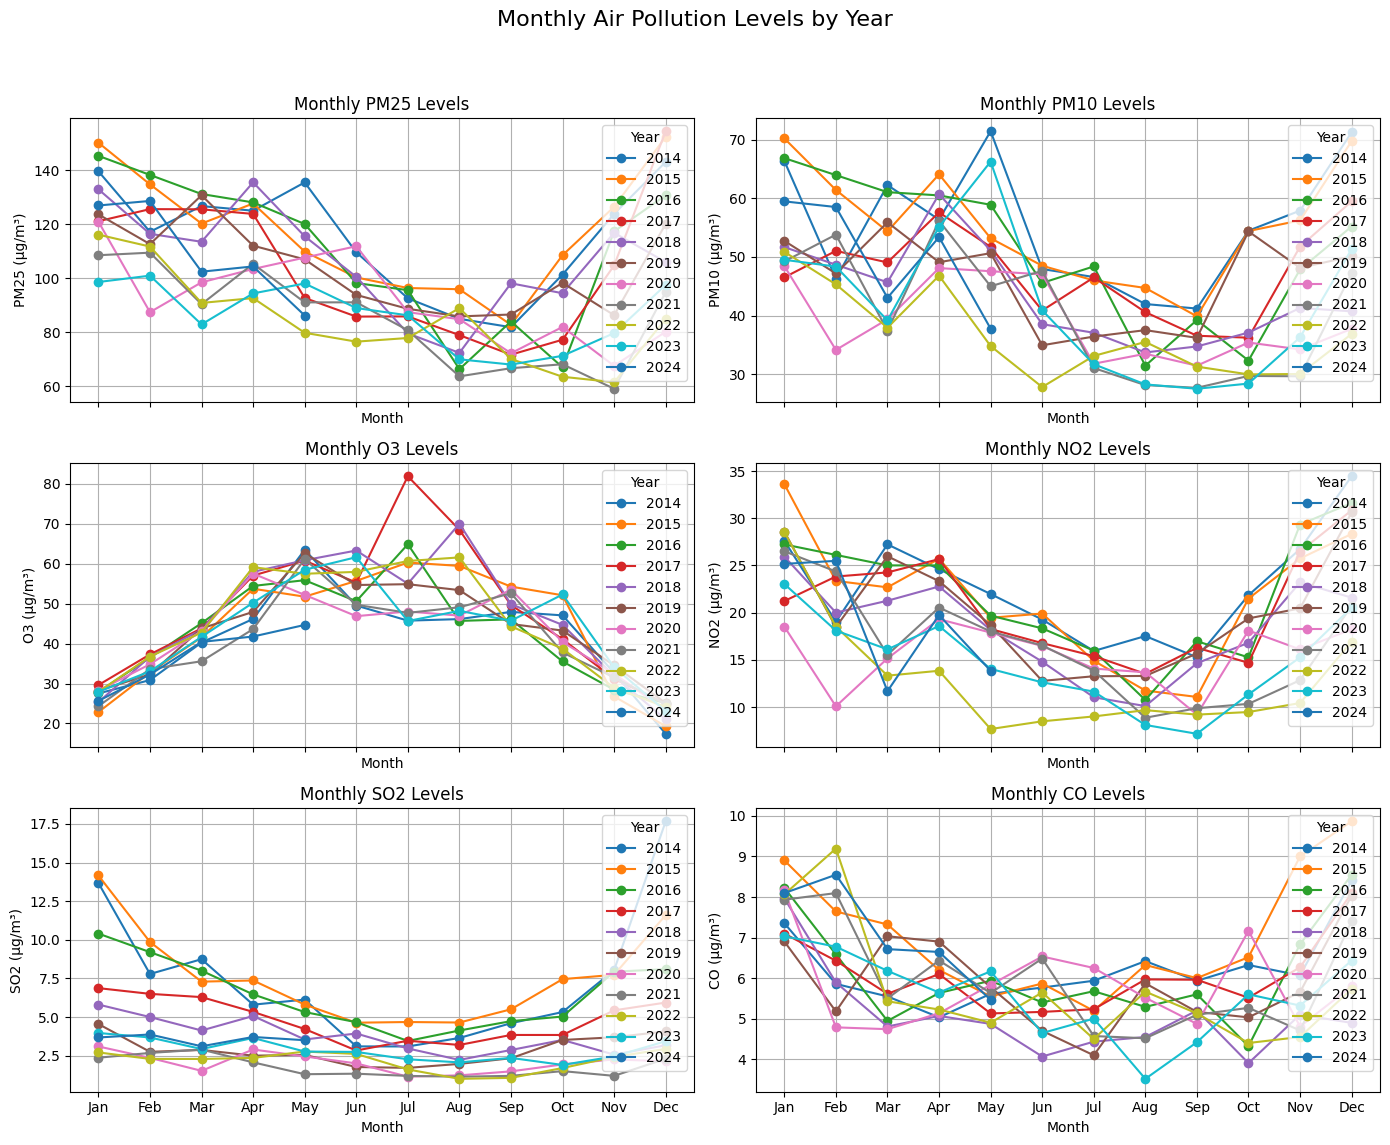

In [261]:
# Convert 'year_month' to datetime format
data = monthly_avg_interpolated.copy()
data['year_month'] = pd.to_datetime(data['year_month'])

# Extract year and month from 'year_month'
data['year'] = data['year_month'].dt.year
data['month'] = data['year_month'].dt.month
# Plotting all pollutants as subplots in one figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)
fig.suptitle('Monthly Air Pollution Levels by Year', fontsize=16)

pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for ax, pollutant in zip(axes.flatten(), pollutants):
    pollutant_data = data.pivot_table(values=pollutant, index='month', columns='year', aggfunc='mean')
    for column in pollutant_data.columns:
        ax.plot(pollutant_data.index, pollutant_data[column], marker='o', label=column)
    ax.set_title(f'Monthly {pollutant.upper()} Levels')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'{pollutant.upper()} (µg/m³)')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(months)
    ax.grid(True)
    ax.legend(title='Year', loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit the title
plt.savefig('Combined_Monthly_Air_Pollution_Levels.png',dpi=300)
plt.show()


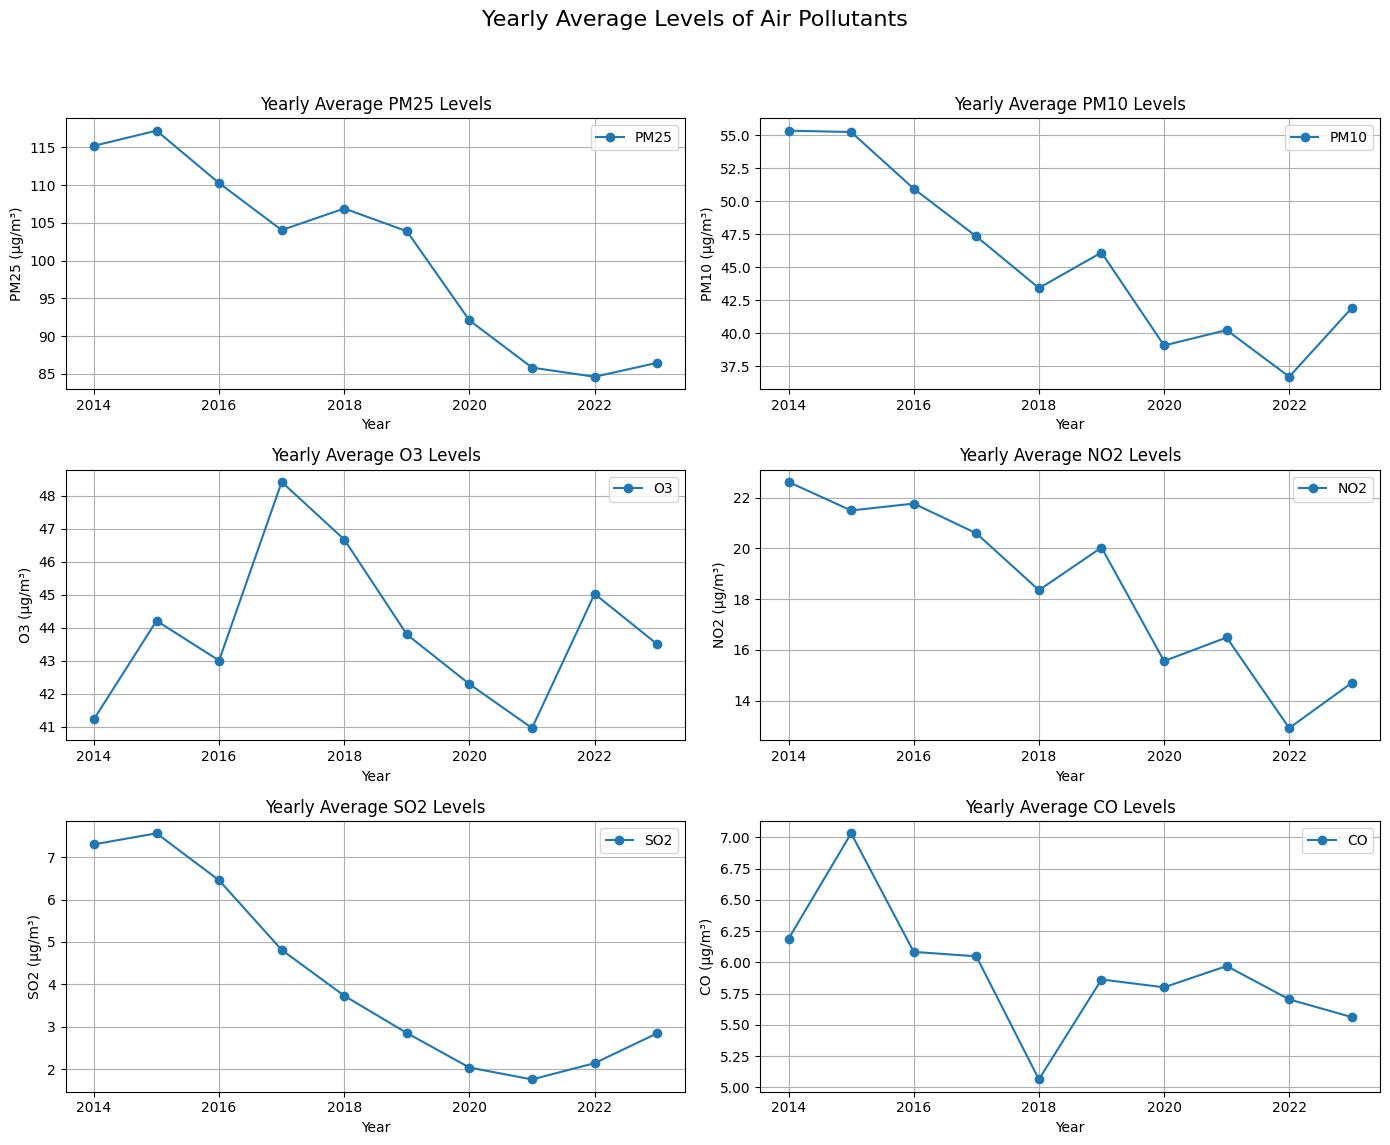

In [262]:
yearly_averages = data.groupby('year').mean().drop(columns='month')
# drop rows with 'year'==2024
yearly_averages = yearly_averages.drop(2024)
# Plotting yearly averages for each pollutant as separate subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Yearly Average Levels of Air Pollutants', fontsize=16)

for ax, pollutant in zip(axes.flatten(), pollutants):
    ax.plot(yearly_averages.index, yearly_averages[pollutant], marker='o', label=pollutant.upper())
    ax.set_title(f'Yearly Average {pollutant.upper()} Levels')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{pollutant.upper()} (µg/m³)')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit the title
plt.savefig('Yearly_Average_Air_Pollutants.png',dpi=300)
plt.show()


(-1.3740682358450023, 0.8683654262330323, 11, 113, {'1%': -4.0412052347395555, '5%': -3.450082195146292, '10%': -3.15025431146506}, 885.8838509079608)
(-1.5340375533931176, 0.8171947451291774, 11, 113, {'1%': -4.0412052347395555, '5%': -3.450082195146292, '10%': -3.15025431146506}, 762.534460218972)
(-2.349123758257287, 0.40699196679605054, 11, 113, {'1%': -4.0412052347395555, '5%': -3.450082195146292, '10%': -3.15025431146506}, 727.71196504463)
(-2.331855686283188, 0.41641616324940534, 11, 113, {'1%': -4.0412052347395555, '5%': -3.450082195146292, '10%': -3.15025431146506}, 619.0897085202866)
(1.177499379846781, 1.0, 11, 113, {'1%': -4.0412052347395555, '5%': -3.450082195146292, '10%': -3.15025431146506}, 229.95285177114323)
(-1.956567108447501, 0.6248792088228023, 11, 113, {'1%': -4.0412052347395555, '5%': -3.450082195146292, '10%': -3.15025431146506}, 321.028996916776)


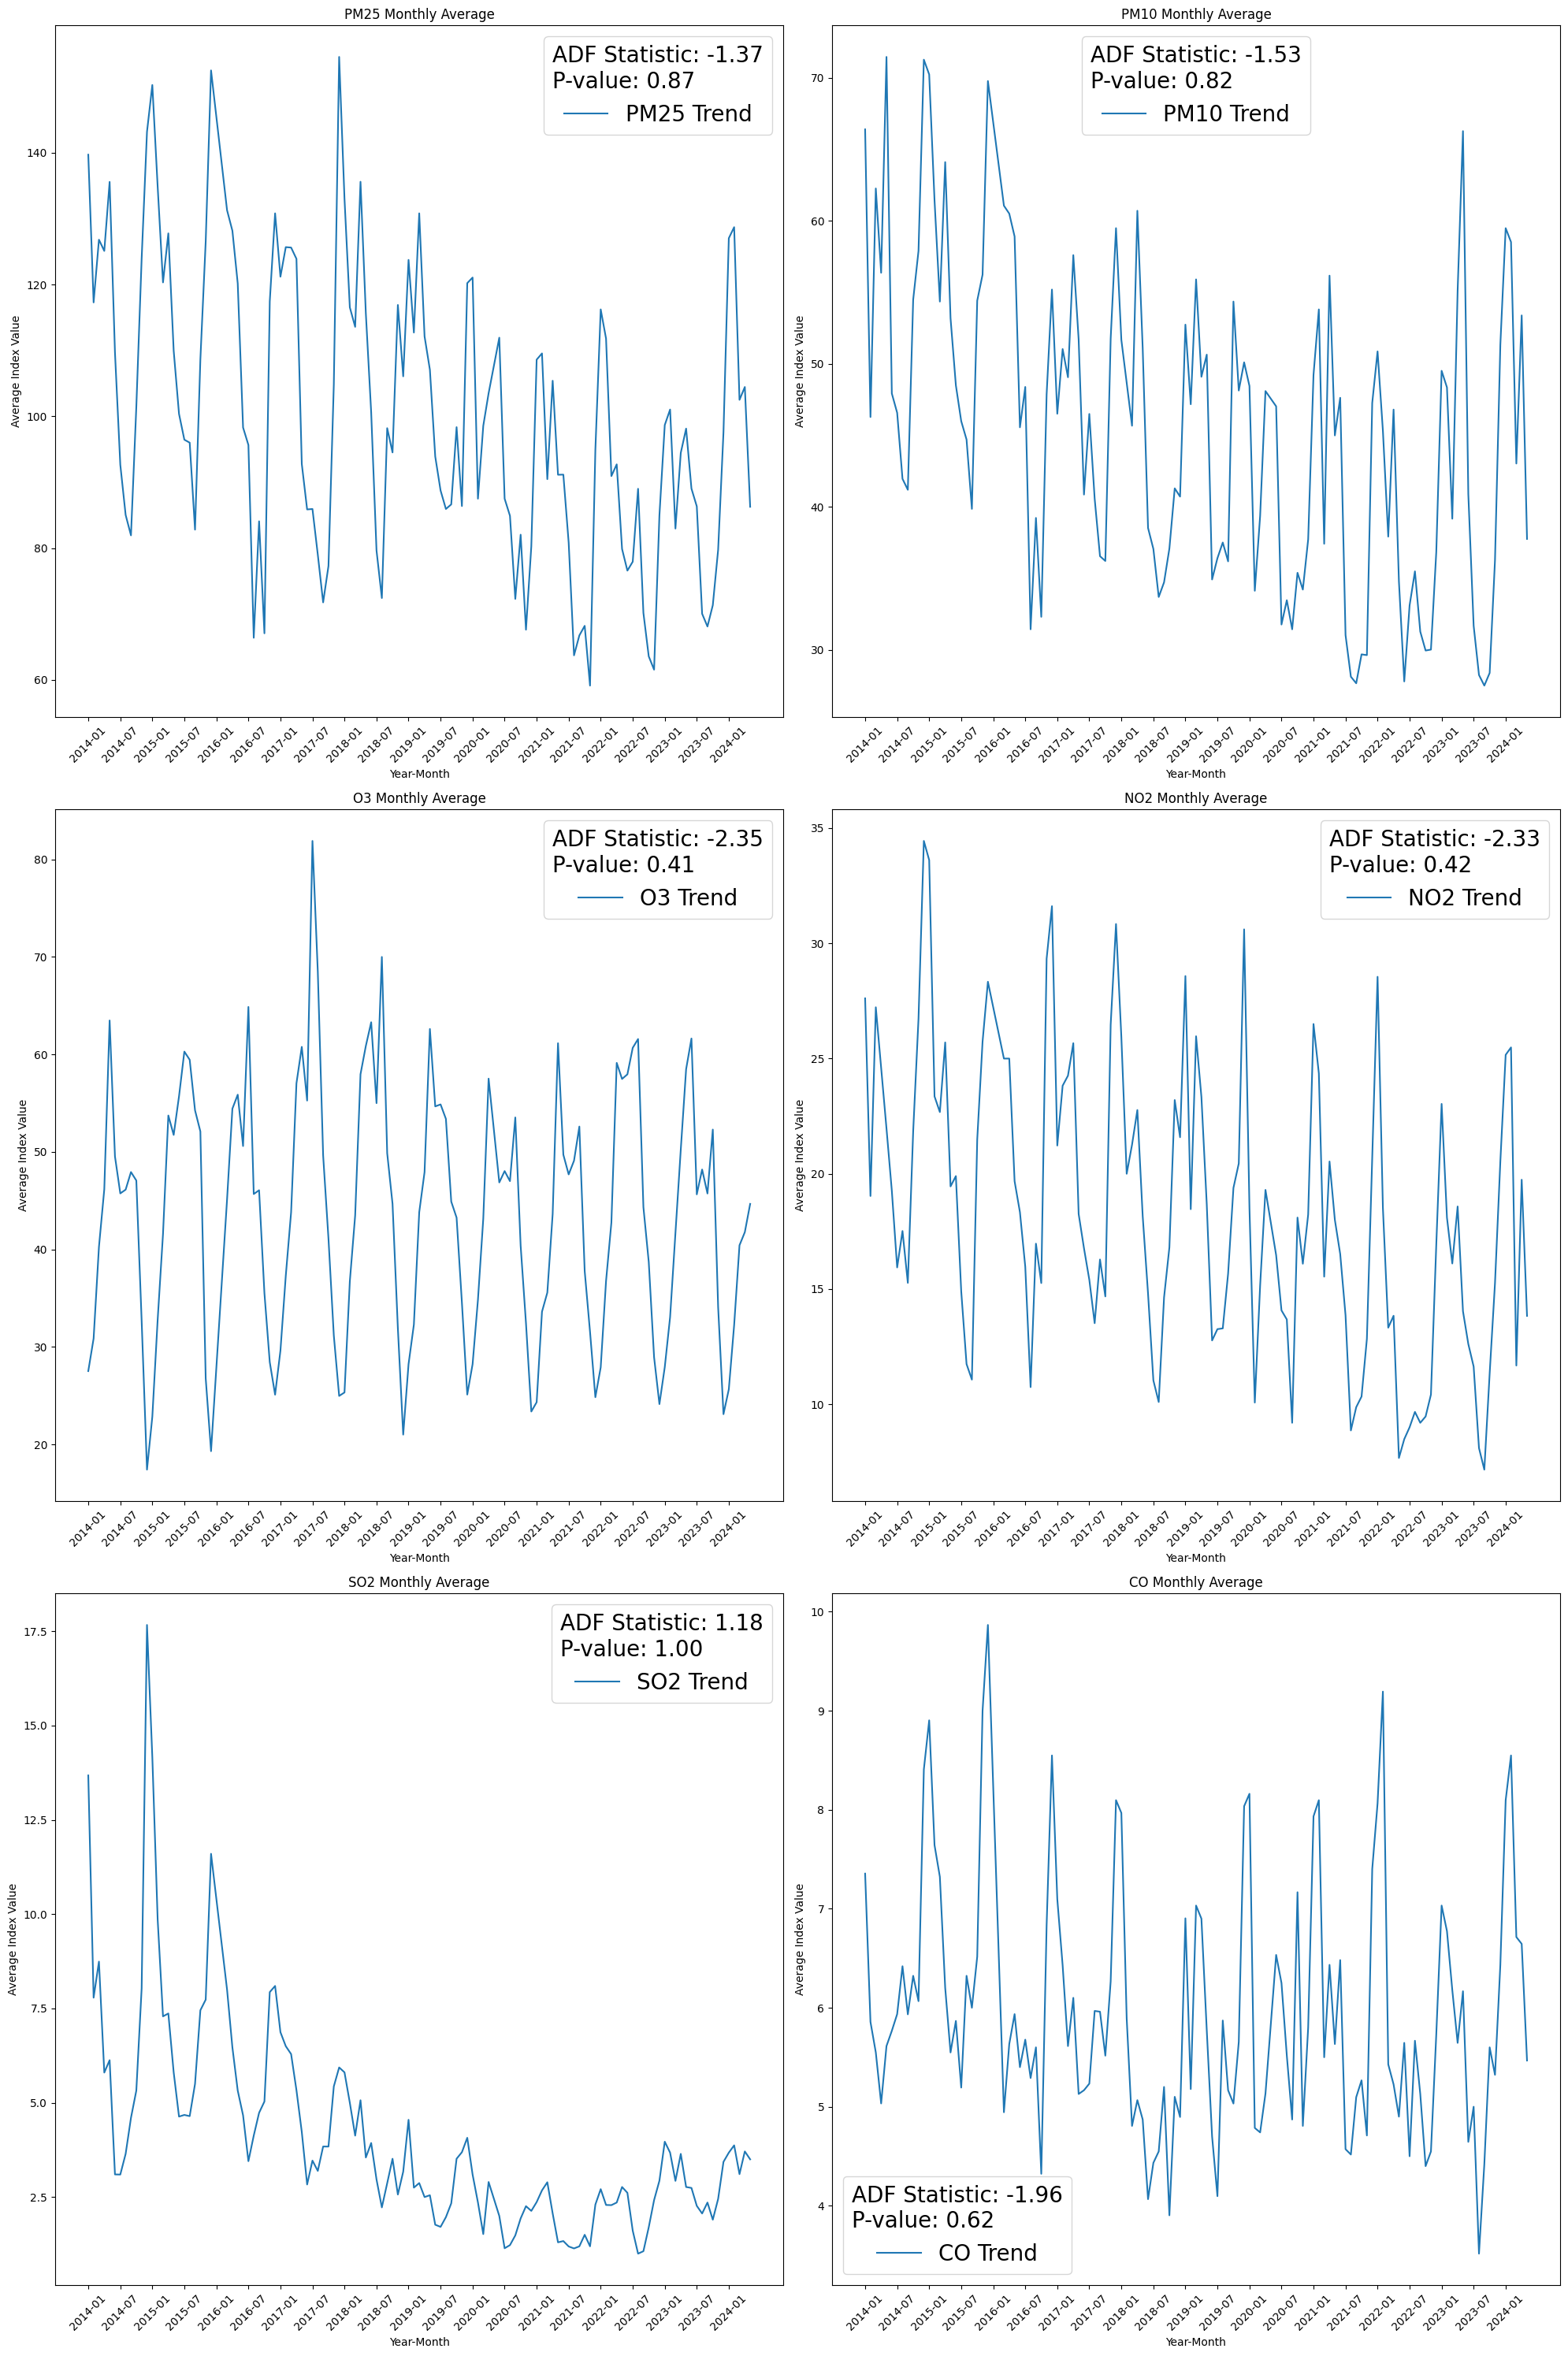

In [263]:
monthly_avg_interpolated['simple_date'] = monthly_avg_interpolated['year_month'].dt.strftime('%Y-%m')

def plot_and_adf_test_simplified(data, column, ax):
    # Plotting the time series with fewer x-axis labels
    ax.plot(data['simple_date'], data[column], label=f'{column.upper()} Trend')
    ax.set_title(f'{column.upper()} Monthly Average')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Average Index Value')
    # Set xticks to display fewer labels to avoid clutter
    ax.set_xticks(ax.get_xticks()[::6])
    ax.tick_params(axis='x', rotation=45)

    # ADF test
    result = adfuller(data[column].dropna(),regression='ct')
    print(result)
    adf_statistic, p_value = result[0], result[1]
    ax.legend(title=f'ADF Statistic: {adf_statistic:.2f}\nP-value: {p_value:.2f}',fontsize = 20, title_fontsize = 20)

# Creating subplots for each pollutant with increased width for better visibility
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))
axes = axes.flatten()

# Plot and test for each pollutant
for i, pollutant in enumerate(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']):
    plot_and_adf_test_simplified(monthly_avg_interpolated, pollutant, axes[i])

# Adjust layout and show plots
plt.tight_layout()
plt.savefig('monthly_avg_adf.png', dpi=300)
plt.show()

(-9.779444325648262, 6.795129395465894e-17, 10, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 877.5780641247804)
(-9.073253176607562, 4.245857888953906e-15, 10, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 756.8415112576245)
(-9.964594305272465, 2.325031402250982e-17, 10, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 726.6823980741349)
(-11.45571271596634, 5.713551626741105e-21, 10, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 616.6727072351474)
(-2.9717226511941597, 0.037620867964521104, 13, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}, 235.47140097026937)
(-8.574664738285001, 8.02319370187524e-14, 10, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 318.05310950729734)


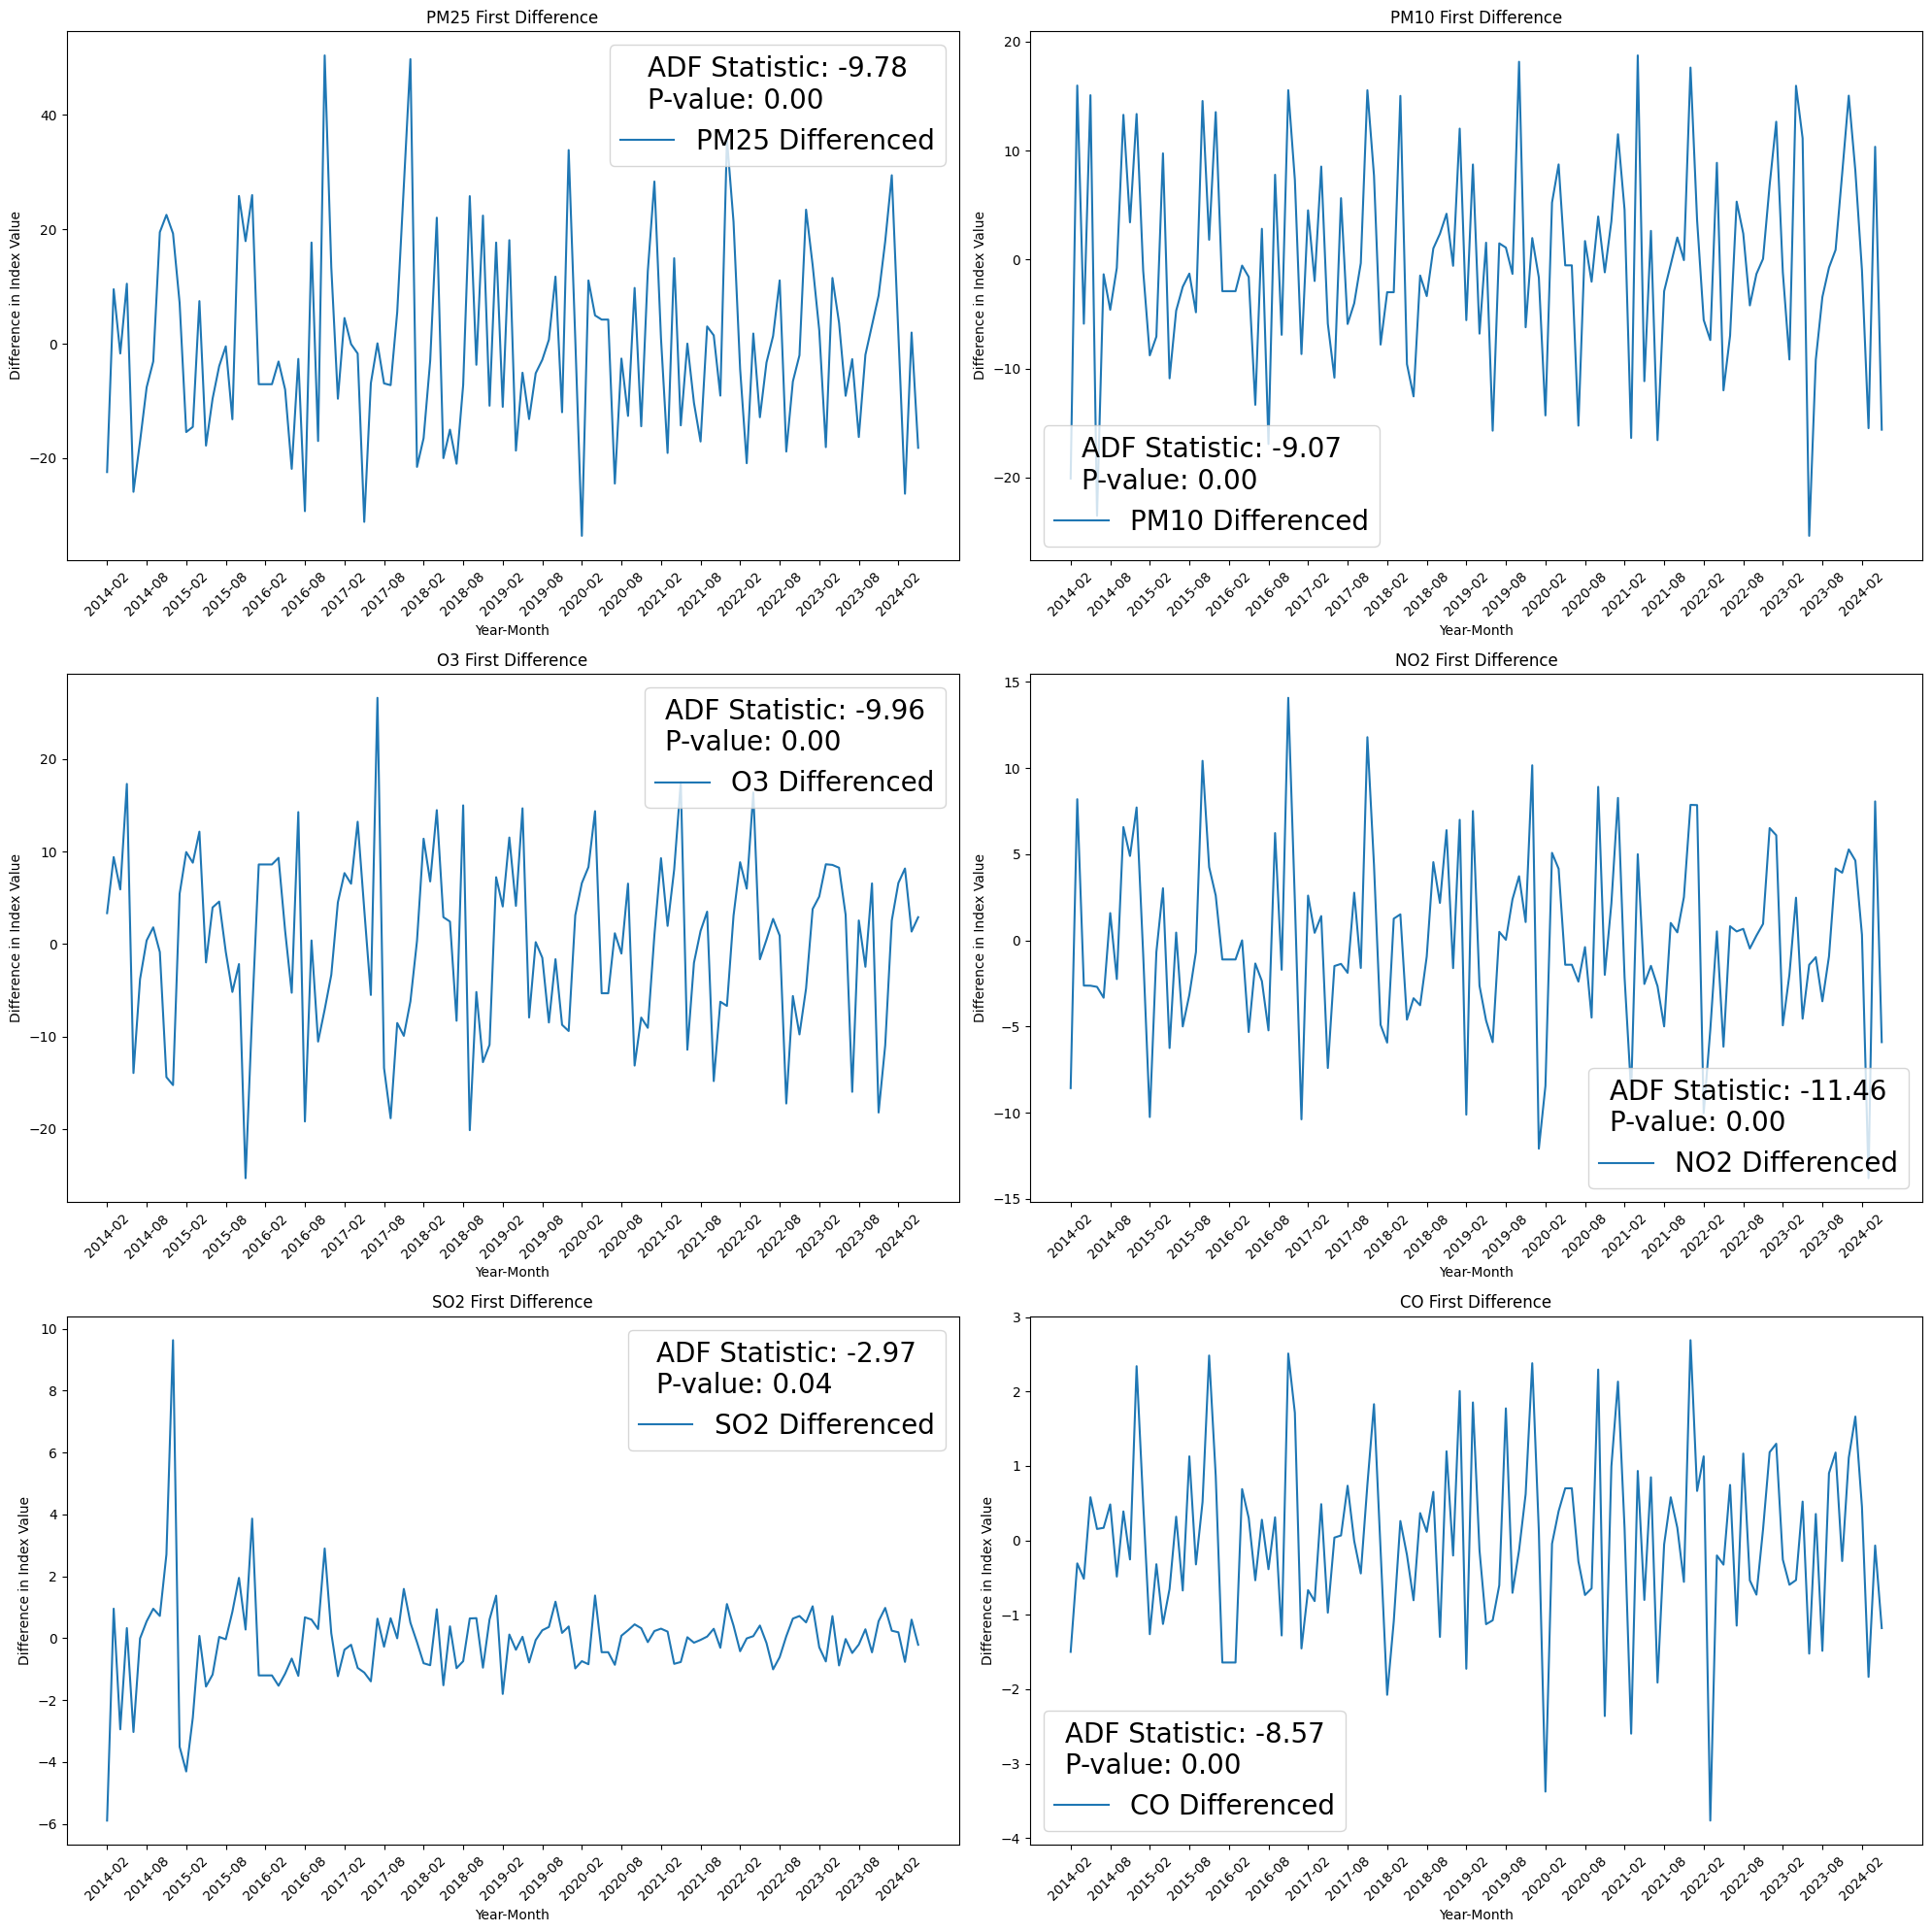

In [264]:
# Function to perform first differencing and ADF test on the differenced series
def first_difference_and_adf(data, column, ax):
    # Calculating first difference of the time series
    differenced_series = data[column].diff().dropna()
    
    # Plotting the differenced time series
    ax.plot(data['simple_date'].iloc[1:], differenced_series, label=f'{column.upper()} Differenced')
    ax.set_title(f'{column.upper()} First Difference')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Difference in Index Value')
    # Set xticks to display fewer labels to avoid clutter
    ax.set_xticks(ax.get_xticks()[::6])
    ax.tick_params(axis='x', rotation=45)
    
    # ADF test on the differenced series
    result = adfuller(differenced_series)
    print(result)
    adf_statistic, p_value = result[0], result[1]
    # Display ADF test results
    ax.legend(title=f'ADF Statistic: {adf_statistic:.2f}\nP-value: {p_value:.2f}',fontsize = 20, title_fontsize = 20)

# Creating subplots for each pollutant with increased width for better visibility
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Apply first differencing and ADF test for each pollutant
for i, pollutant in enumerate(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']):
    first_difference_and_adf(monthly_avg_interpolated, pollutant, axes[i])

# Adjust layout and show plots
plt.tight_layout()
plt.savefig('monthly_avg_first_diff_adf.png', dpi=300)
plt.show()


(0.24841331716006665, 0.9960335247614281, 10, 114, {'1%': -4.0404611509884285, '5%': -3.449728197718056, '10%': -3.1500478236218434}, -18.491597709988696)


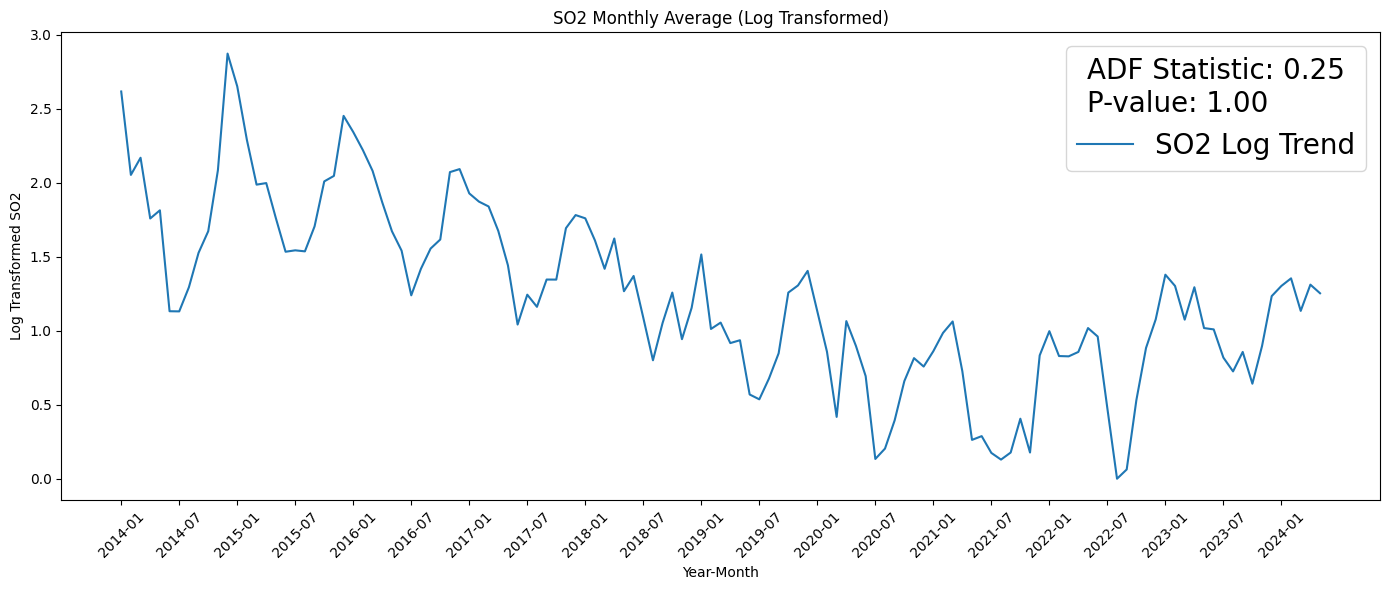

(-8.024056482764994, 2.0397128890968884e-12, 9, 114, {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}, -17.16297891025286)


<function matplotlib.pyplot.show(close=None, block=None)>

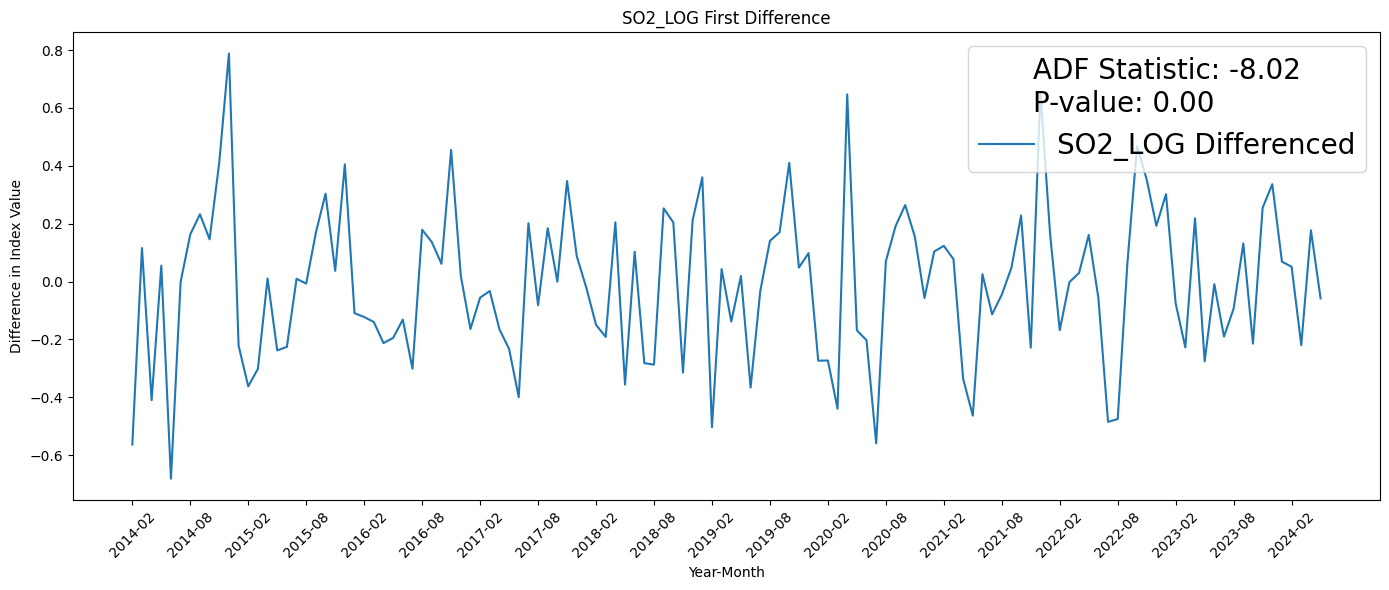

In [289]:
# take log on data['SO2'] and see the ADF

monthly_avg_interpolated['so2_log'] = np.log(monthly_avg_interpolated['so2'])
# Plotting the time series with fewer x-axis labels
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg_interpolated['simple_date'], monthly_avg_interpolated['so2_log'], label='SO2 Log Trend')
plt.title('SO2 Monthly Average (Log Transformed)')
plt.xlabel('Year-Month')
plt.ylabel('Log Transformed SO2')
plt.xticks(monthly_avg_interpolated['simple_date'][::6], rotation=45)
result = adfuller(monthly_avg_interpolated['so2_log'].dropna(),regression='ct')
print(result)
adf_statistic, p_value = result[0], result[1]
plt.legend(title=f'ADF Statistic: {adf_statistic:.2f}\nP-value: {p_value:.2f}',fontsize = 20, title_fontsize = 20)
plt.tight_layout()
plt.savefig('so2_log.png', dpi=300)
plt.show()

fig, axes = plt.subplots(1,1, figsize=(14, 6))

# Apply first differencing and ADF test for each pollutant
first_difference_and_adf(monthly_avg_interpolated, 'so2_log', axes)
plt.tight_layout()
plt.savefig('so2_log_first_diff.png', dpi=300)
plt.show

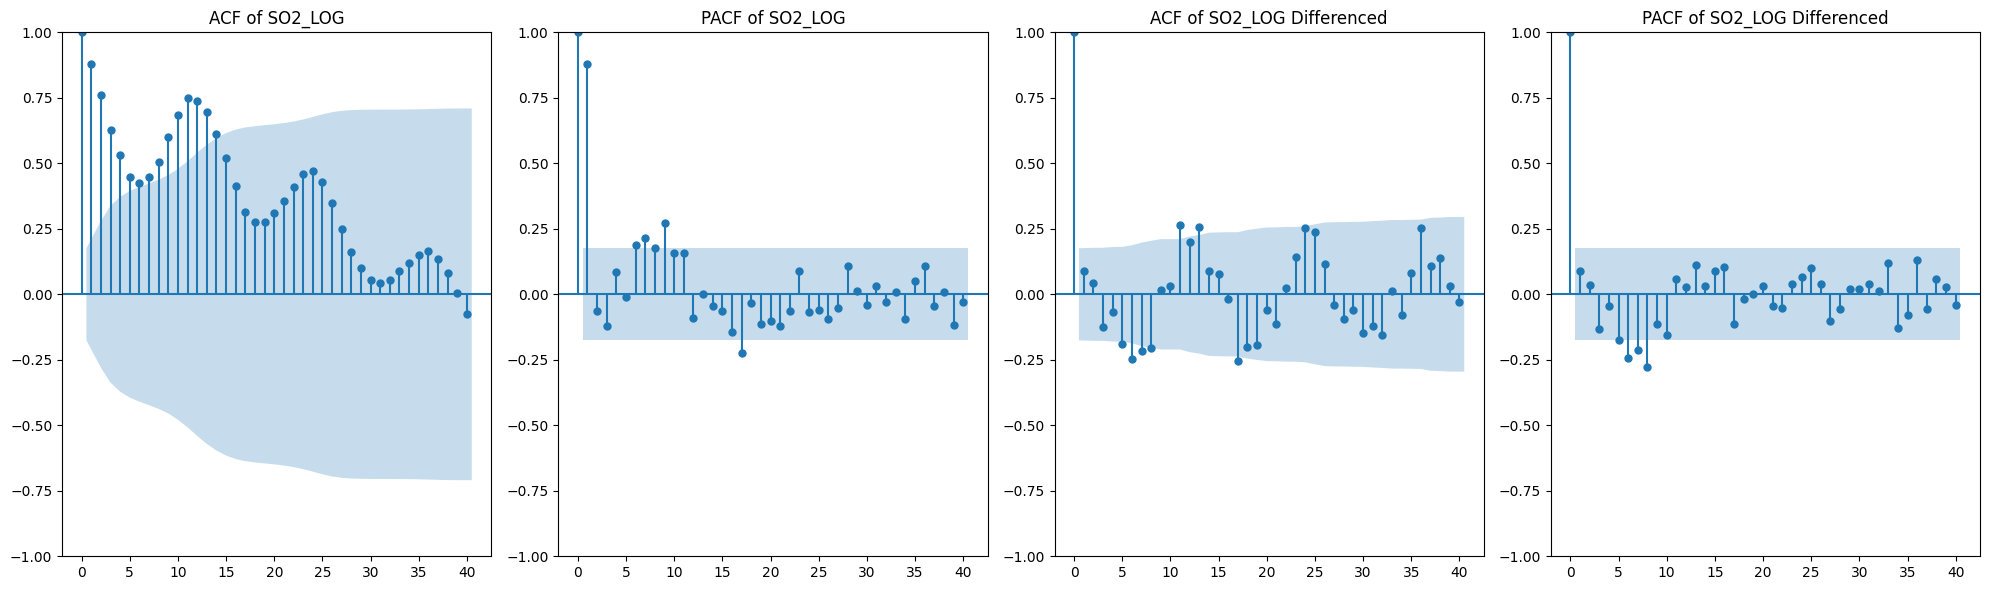

In [272]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define a function to plot ACF and PACF
def plot_acf_pacf(data, column, lags, fig):
    # Original data plots
    ax1 = fig.add_subplot(1, 4, 1)
    plot_acf(data[column].dropna(), ax=ax1, lags=lags, title=f'ACF of {column.upper()}')
    ax2 = fig.add_subplot(1, 4,2)
    plot_pacf(data[column].dropna(), ax=ax2, lags=lags, title=f'PACF of {column.upper()}')
    
    # Differenced data plots
    differenced_series = data[column].diff().dropna()
    ax3 = fig.add_subplot(1, 4,3)
    plot_acf(differenced_series, ax=ax3, lags=lags, title=f'ACF of {column.upper()} Differenced')
    ax4 = fig.add_subplot(1, 4,4)
    plot_pacf(differenced_series, ax=ax4, lags=lags, title=f'PACF of {column.upper()} Differenced')

# Create a large figure to hold all ACF and PACF plots
fig = plt.figure(figsize=(20, 6))

# Plot ACF and PACF for each pollutant
plot_acf_pacf(monthly_avg_interpolated, 'so2_log', 40, fig)

plt.tight_layout()
plt.savefig('so2_log_monthly_avg_acf_pacf.png', dpi=300)
plt.show()


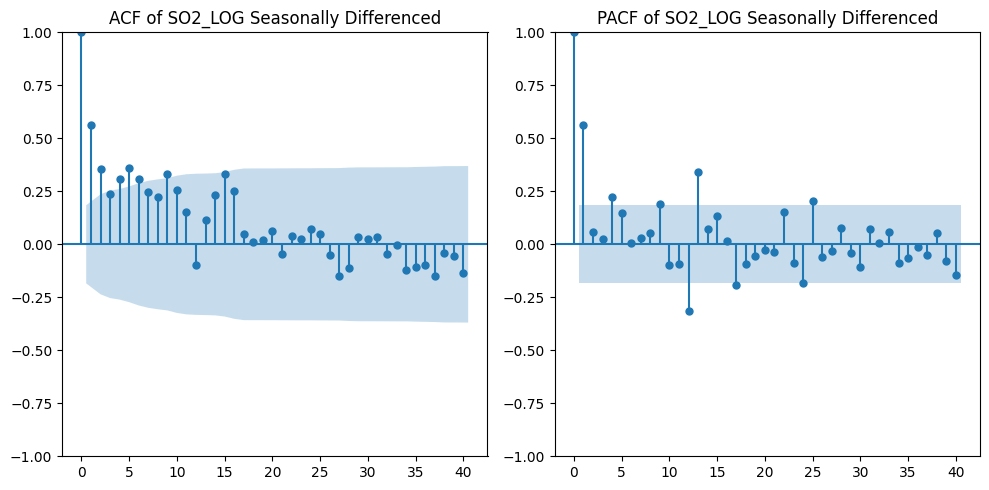

In [282]:
def plot_acf_pacf(data, column, lags, fig, seasonal_lag=12):
    # Seasonally differenced data plots
    seasonally_differenced_series = data[column].diff(seasonal_lag).dropna()
    ax5 = fig.add_subplot(1, 2, 1)
    plot_acf(seasonally_differenced_series, ax=ax5, lags=lags, title=f'ACF of {column.upper()} Seasonally Differenced')
    ax6 = fig.add_subplot(1, 2,2)
    plot_pacf(seasonally_differenced_series, ax=ax6, lags=lags, title=f'PACF of {column.upper()} Seasonally Differenced')
# Create a large figure to hold all ACF and PACF plots
fig = plt.figure(figsize=(10, 5))  # Adjusted size to accommodate more plots

# Example usage with sample data structure
# Assume 'monthly_avg_interpolated' is your DataFrame containing the pollutant data
plot_acf_pacf(monthly_avg_interpolated, 'so2_log', 40, fig)

plt.tight_layout()
plt.savefig('so2_log_seasonal_monthly_avg_acf_pacf.png', dpi=300)  # Save the figure with high resolution
plt.show()

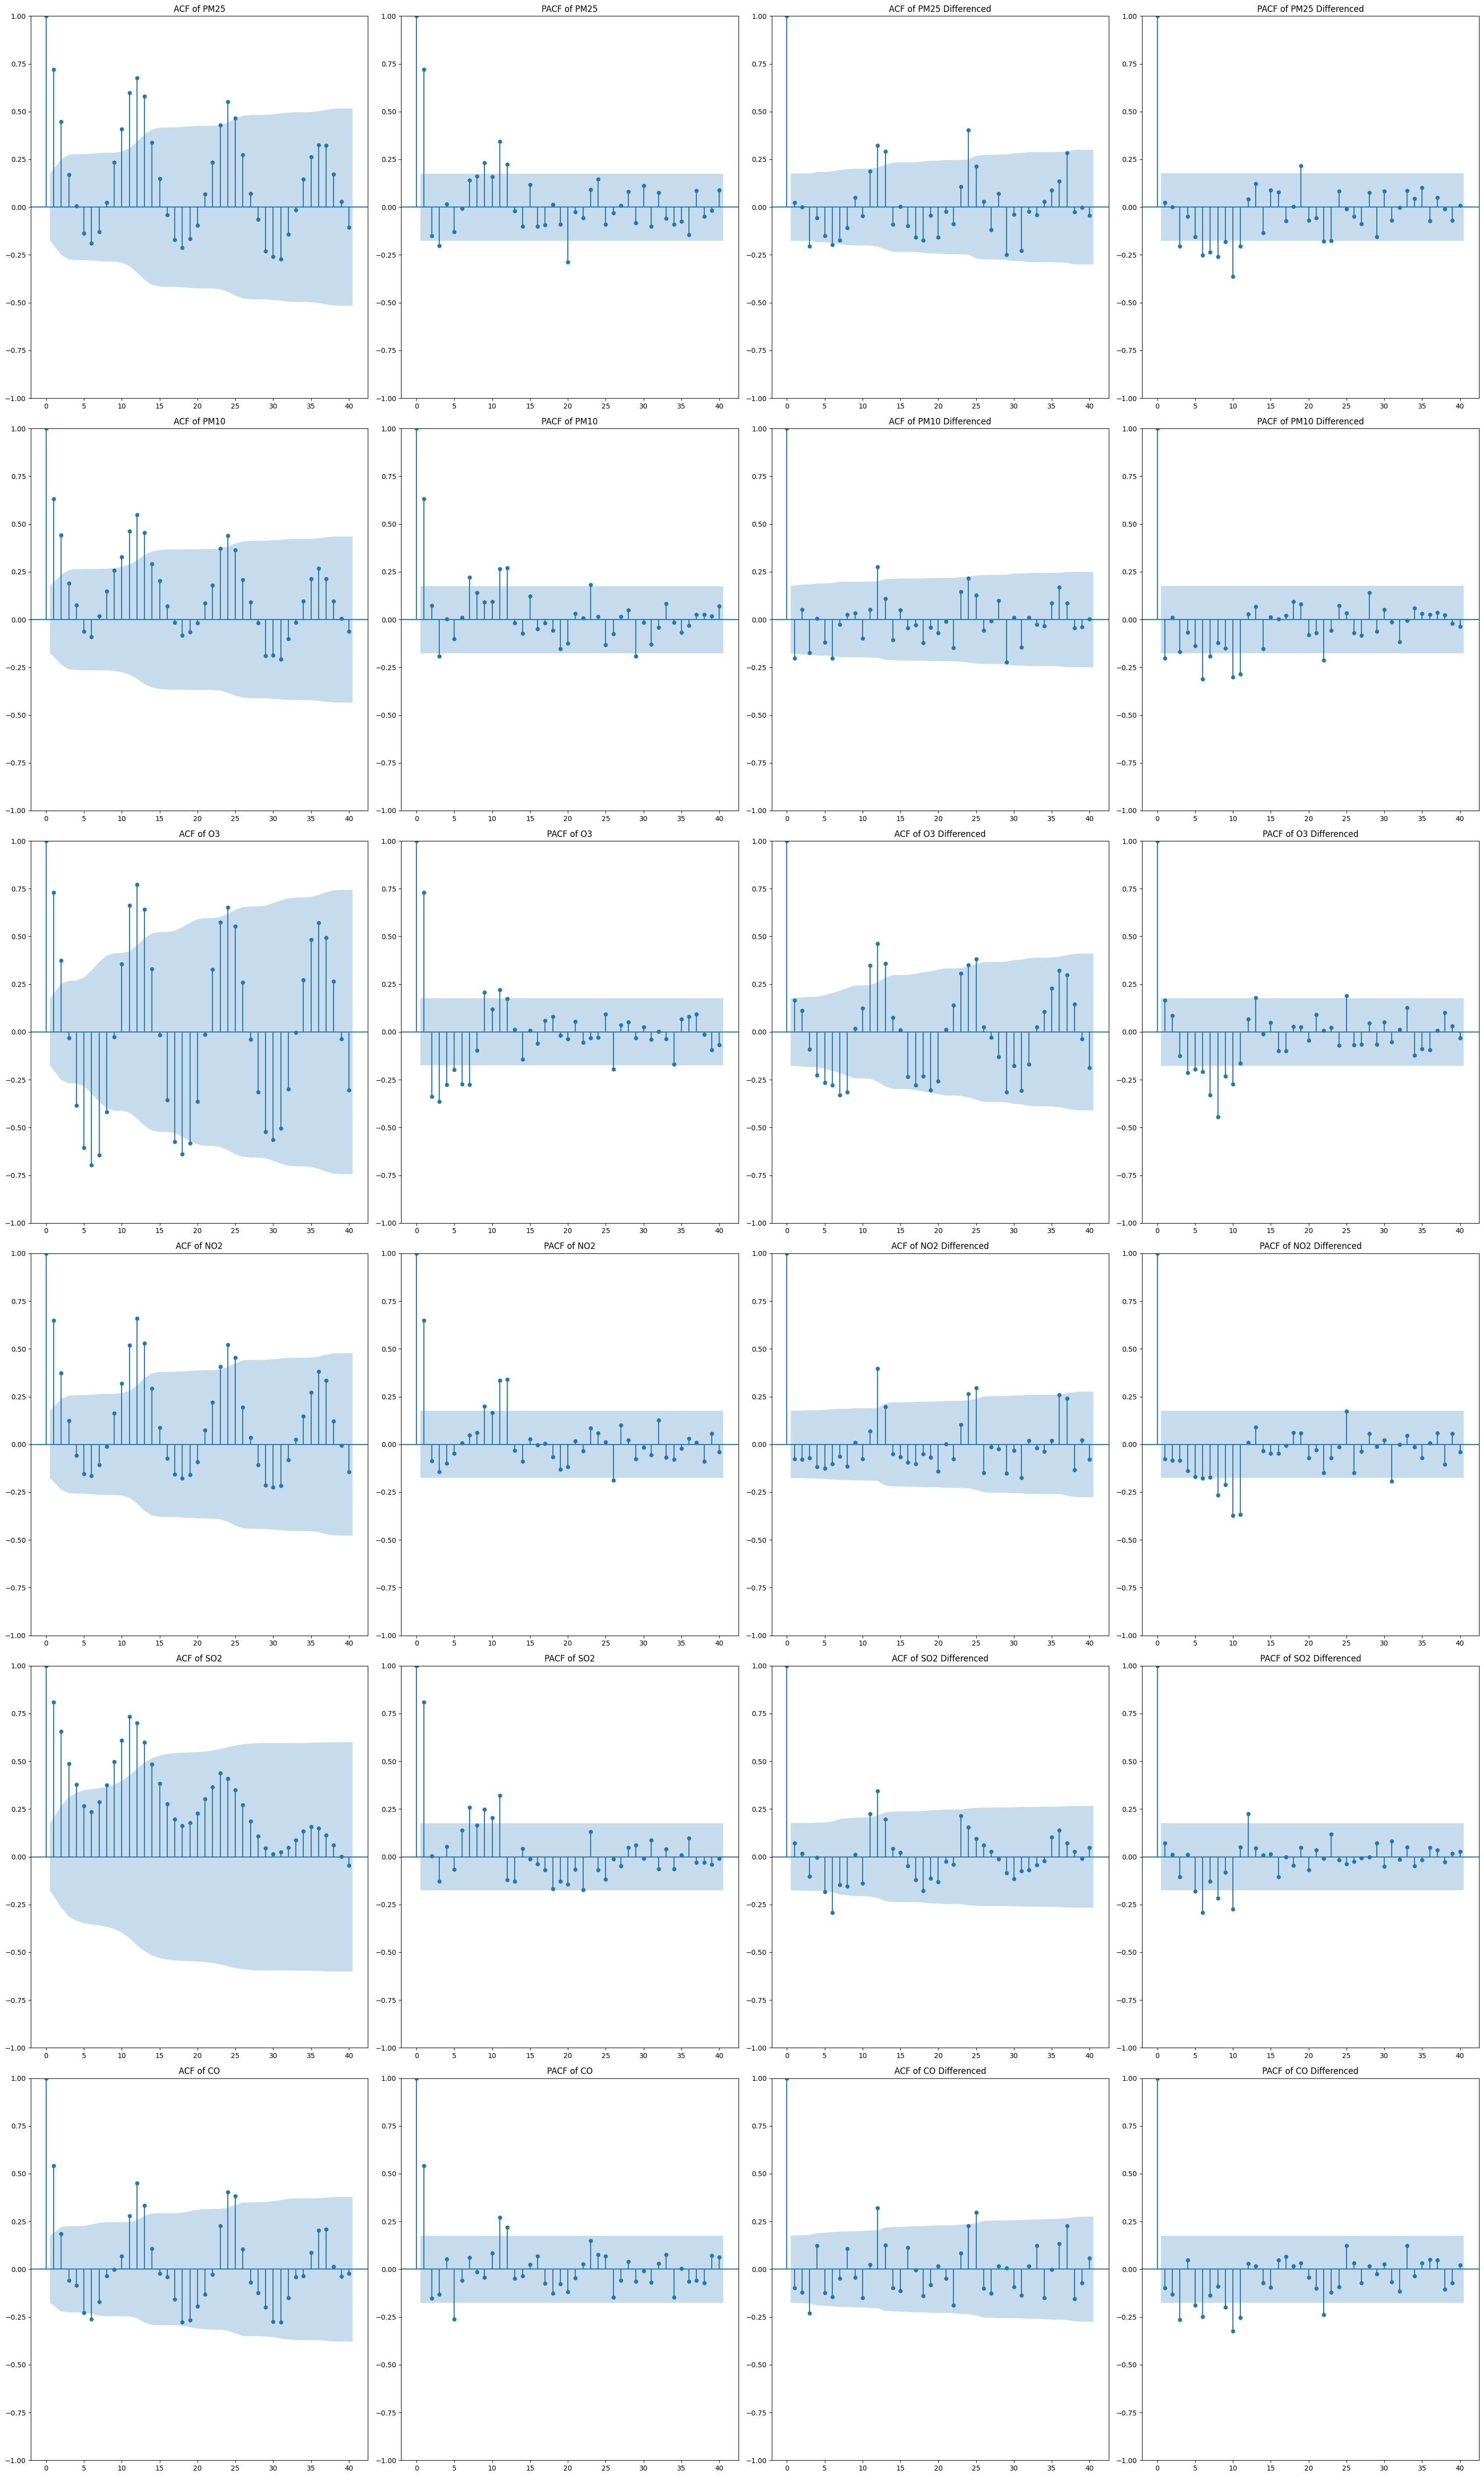

In [277]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define a function to plot ACF and PACF
def plot_acf_pacf(data, column, lags, fig, row, col):
    # Original data plots
    ax1 = fig.add_subplot(6, 4, 1 + 4 * row + col)
    plot_acf(data[column].dropna(), ax=ax1, lags=lags, title=f'ACF of {column.upper()}')
    ax2 = fig.add_subplot(6, 4, 2 + 4 * row + col)
    plot_pacf(data[column].dropna(), ax=ax2, lags=lags, title=f'PACF of {column.upper()}')
    
    # Differenced data plots
    differenced_series = data[column].diff().dropna()
    ax3 = fig.add_subplot(6, 4, 3 + 4 * row + col)
    plot_acf(differenced_series, ax=ax3, lags=lags, title=f'ACF of {column.upper()} Differenced')
    ax4 = fig.add_subplot(6, 4, 4 + 4 * row + col)
    plot_pacf(differenced_series, ax=ax4, lags=lags, title=f'PACF of {column.upper()} Differenced')

# Create a large figure to hold all ACF and PACF plots
fig = plt.figure(figsize=(30, 50))

# Plot ACF and PACF for each pollutant
for i, pollutant in enumerate(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']):
    plot_acf_pacf(monthly_avg_interpolated, pollutant, 40, fig, i, 0)

plt.tight_layout()
plt.savefig('monthly_avg_acf_pacf.png', dpi=300)
plt.show()


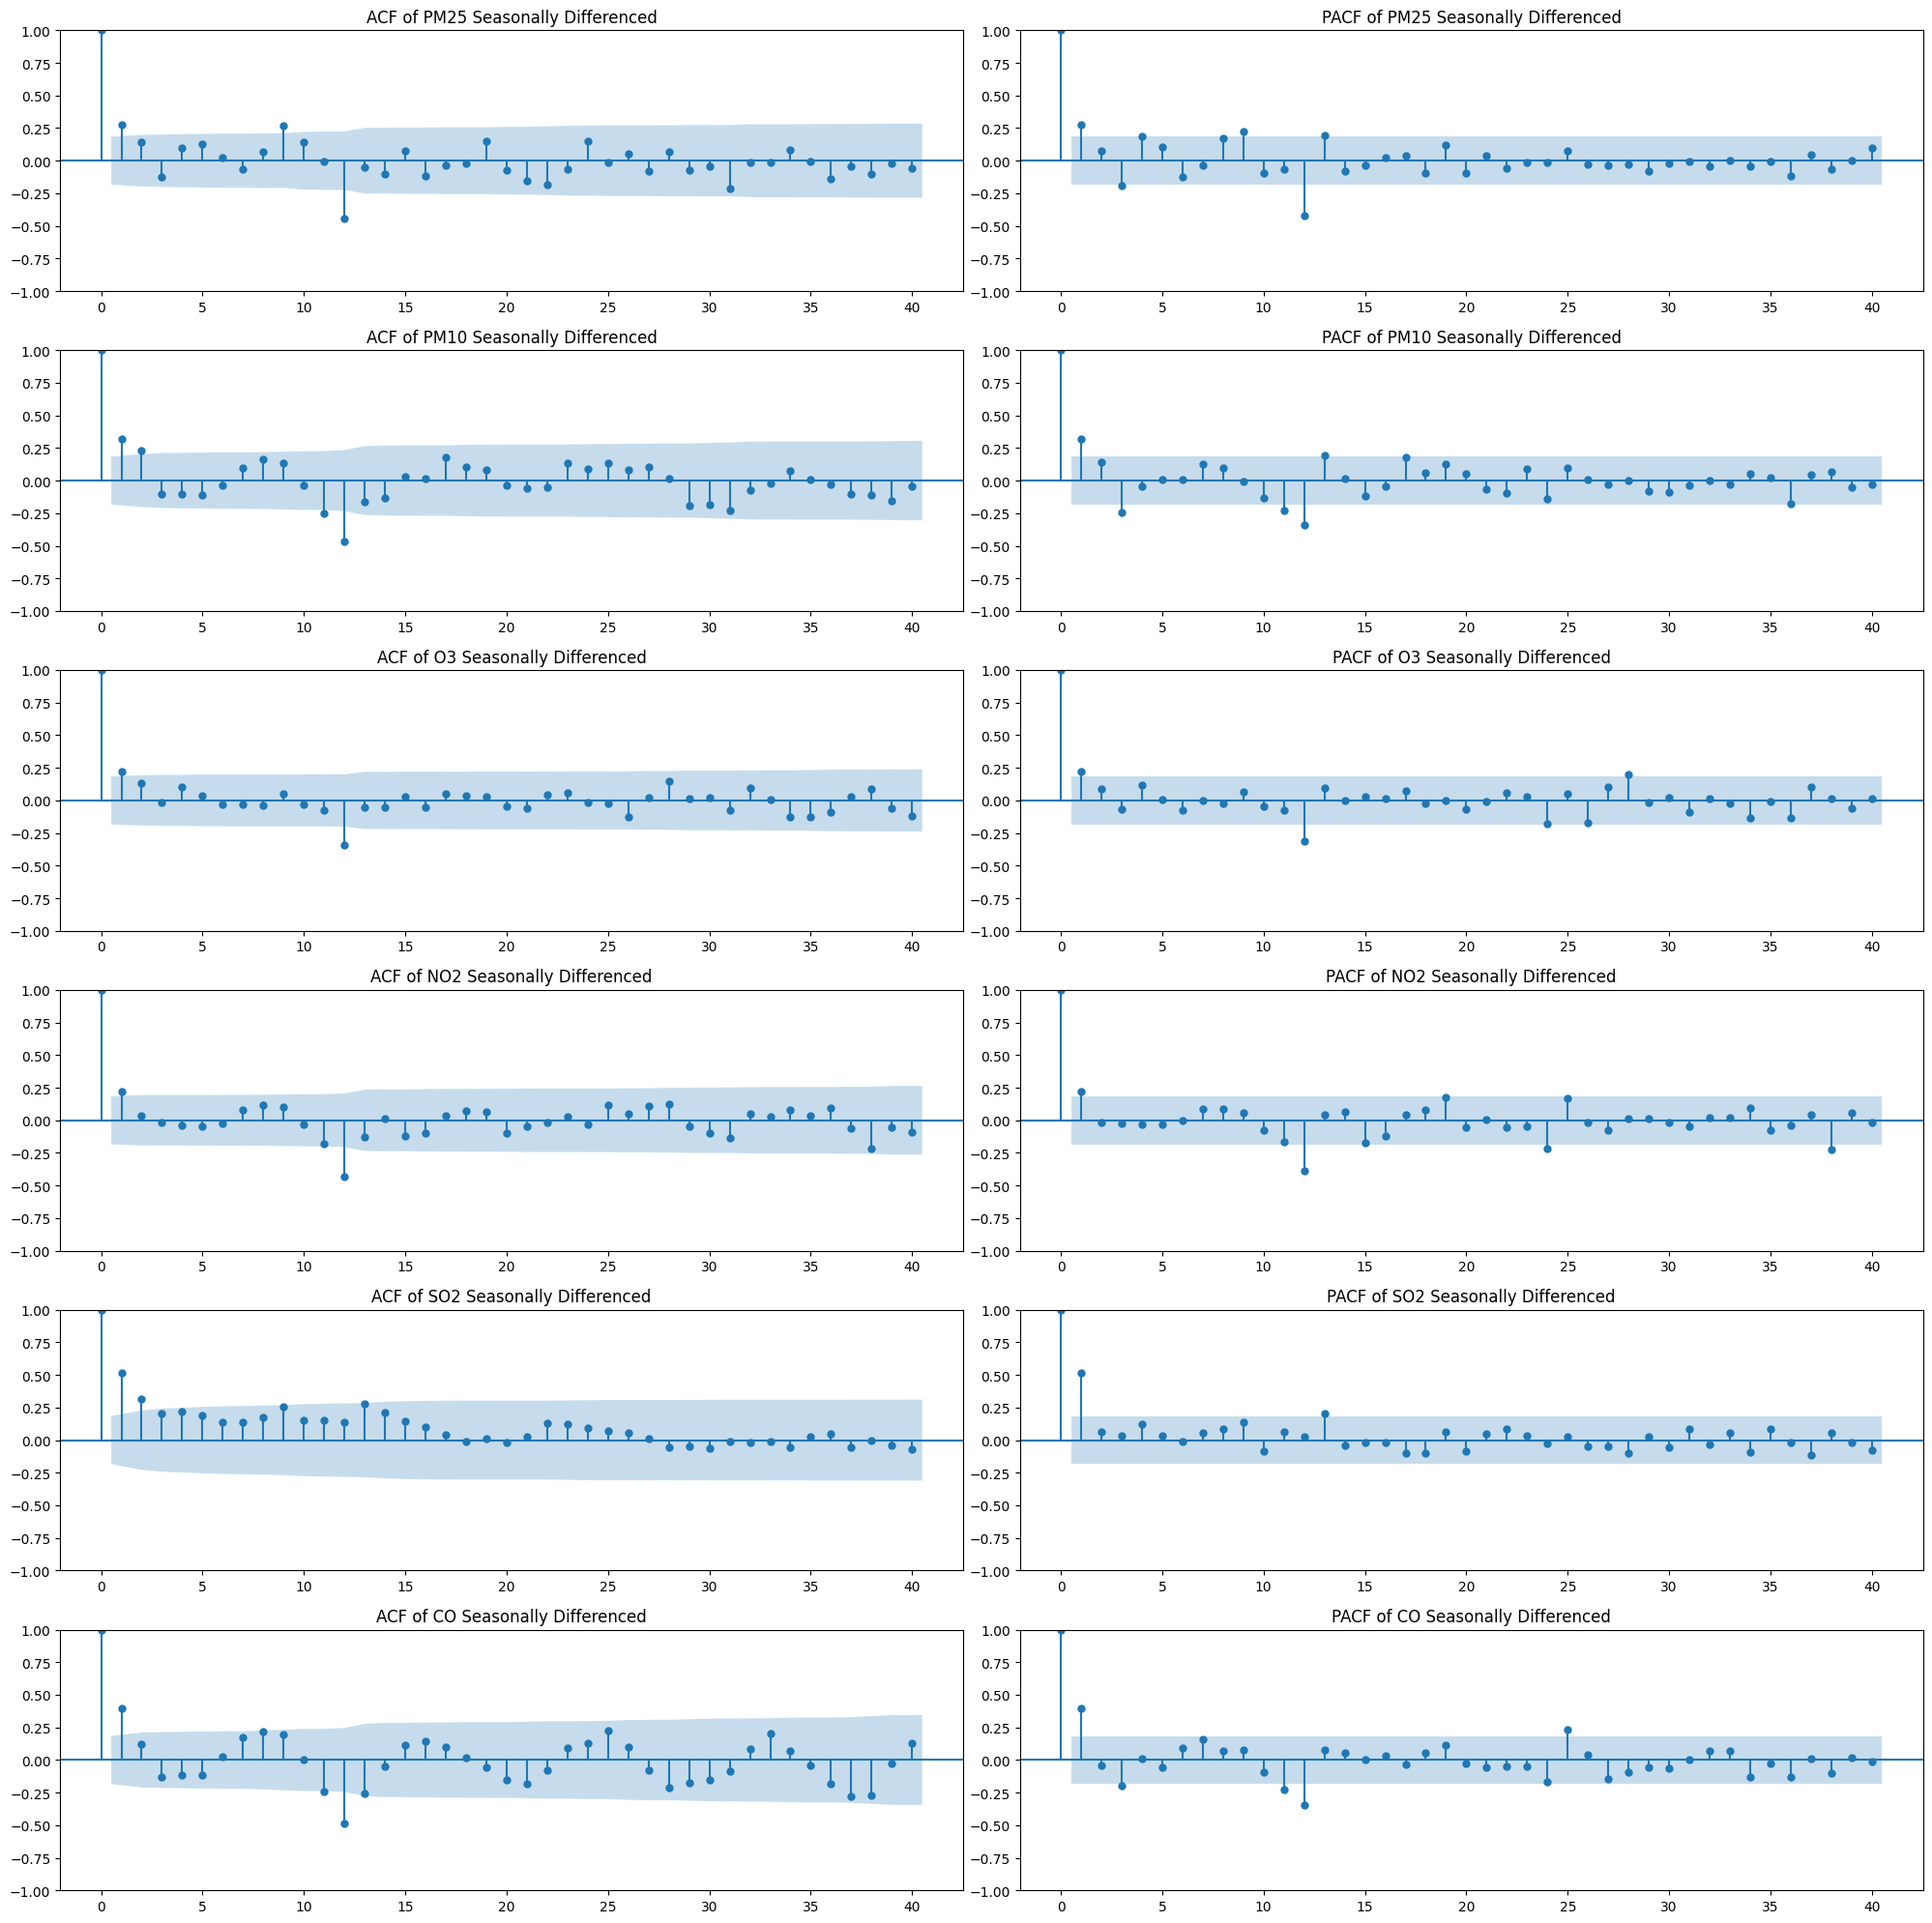

In [278]:
def plot_acf_pacf(data, column, lags, fig, row, col, seasonal_lag=12):
    # Seasonally differenced data plots
    seasonally_differenced_series = data[column].diff(seasonal_lag).dropna()
    ax5 = fig.add_subplot(6, 2, 1 + 2 * row + col)
    plot_acf(seasonally_differenced_series, ax=ax5, lags=lags, title=f'ACF of {column.upper()} Seasonally Differenced')
    ax6 = fig.add_subplot(6, 2, 2 + 2 * row + col)
    plot_pacf(seasonally_differenced_series, ax=ax6, lags=lags, title=f'PACF of {column.upper()} Seasonally Differenced')
# Create a large figure to hold all ACF and PACF plots
fig = plt.figure(figsize=(20, 20))  # Adjusted size to accommodate more plots

# Example usage with sample data structure
# Assume 'monthly_avg_interpolated' is your DataFrame containing the pollutant data
for i, pollutant in enumerate(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']):
    plot_acf_pacf(monthly_avg_interpolated, pollutant, 40, fig, i, 0)

plt.tight_layout()
plt.savefig('seasonal_monthly_avg_acf_pacf.png', dpi=300)  # Save the figure with high resolution
plt.show()

                                      SARIMAX Results                                      
Dep. Variable:                             so2_log   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -5.724
Date:                               周日, 12 5月 2024   AIC                             17.448
Time:                                     22:58:43   BIC                             24.704
Sample:                                          0   HQIC                            20.363
                                             - 108                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4985      0.098     -5.093      0.000      -0.690      -0.307
ar.S.L12      -0.5856      

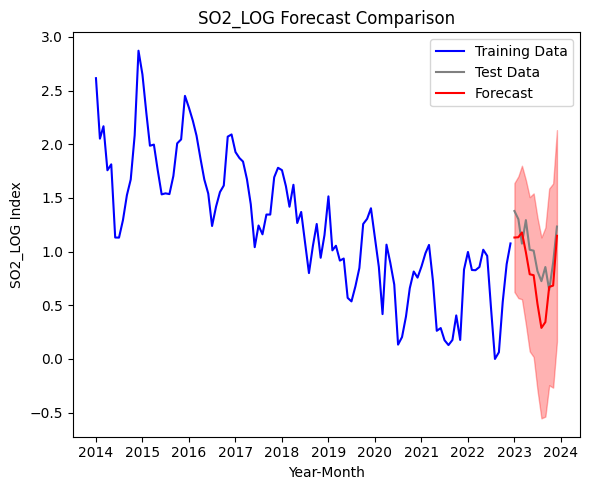

Shapiro-Wilk Test for SO2_LOG:
Statistic: 0.9861425757408142, P-value: 0.41944456100463867



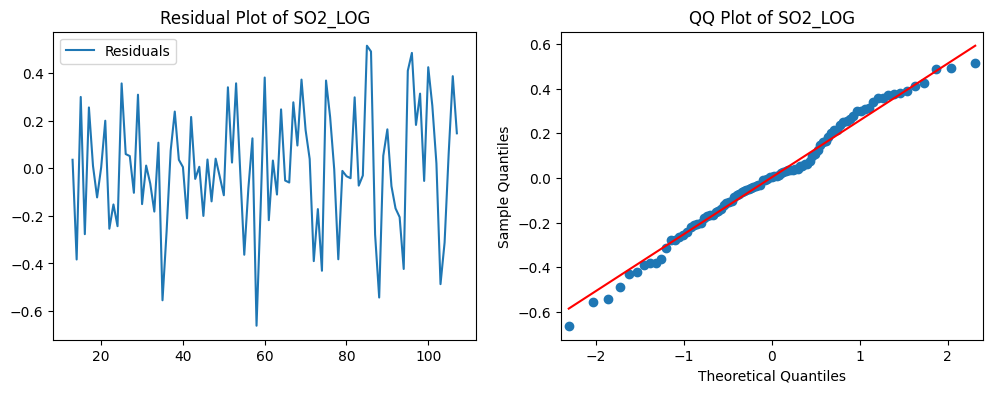

      lb_stat  lb_pvalue
24  33.907881    0.08632


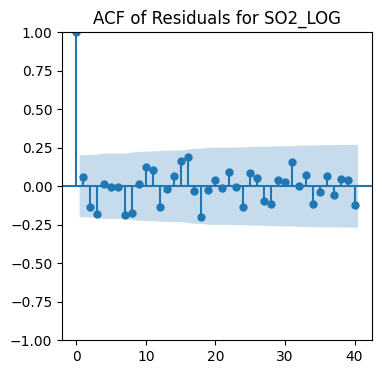

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pandas as pd
# 假设'monthly_avg_interpolated'已经加载且包含完整数据
# 假设数据集已经拆分为训练集和测试集
training_data = monthly_avg_interpolated[monthly_avg_interpolated['year_month'] <= '2022-12']
test_data = monthly_avg_interpolated[(monthly_avg_interpolated['year_month'] > '2022-12') & (monthly_avg_interpolated['year_month'] <= '2023-12') ]

# Models and their parameters based on earlier analysis
model_params = {
    'so2_log': {'order': (0, 1, 1), 'seasonal_order': (1, 1, 0, 12)}
}

# 初始化存储预测结果和置信区间的字典
predictions = {}
confidence_intervals = {}

# 对每种污染物进行模型拟合和预测
for pollutant in ['so2_log']:
    model = SARIMAX(training_data[pollutant],
                    order=model_params[pollutant]['order'],
                    seasonal_order=model_params[pollutant]['seasonal_order'],
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    result = model.fit(disp=False)
    print(result.summary())
    # 为测试集期间进行预测
    forecast = result.get_forecast(steps=len(test_data))
    predictions[pollutant] = forecast.predicted_mean
    confidence_intervals[pollutant] = forecast.conf_int()

# 绘制每种污染物的图表
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

for i, pollutant in enumerate(['so2_log']):
    ax = axes
    ax.plot(training_data['year_month'], training_data[pollutant], label='Training Data', color='blue')
    ax.plot(test_data['year_month'], test_data[pollutant], label='Test Data', color='gray')
    ax.plot(test_data['year_month'], predictions[pollutant], label='Forecast', color='red')
    ax.fill_between(test_data['year_month'], 
                    confidence_intervals[pollutant].iloc[:, 0], 
                    confidence_intervals[pollutant].iloc[:, 1], color='red', alpha=0.3)
    ax.set_title(f'{pollutant.upper()} Forecast Comparison')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel(f'{pollutant.upper()} Index')
    ax.legend()
      # Adjust the x-ticks to show every third month for clarity

plt.tight_layout()
plt.savefig('so2_log_pollutant_forecasts.png', dpi=300)
plt.show()

residuals = result.resid
residuals = residuals[13:]

# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for SO2_LOG:\nStatistic: {shapiro_test.statistic}, P-value: {shapiro_test.pvalue}\n")

# QQ plot and residuals plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('Residual Plot of SO2_LOG')
ax[0].plot(residuals, label='Residuals')
ax[0].legend()
ax[1].set_title('QQ Plot of SO2_LOG')
qqplot(residuals, line='s', ax=ax[1])  # line='s' adds a standardized line
plt.savefig('residuals_SO2_LOG.png', dpi=300)
plt.show()

# ACF plot and Ljung-Box test for residuals
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_acf(residuals, ax=ax, lags=40, title='ACF of Residuals for SO2_LOG')
lb_test = acorr_ljungbox(residuals, lags=[24], return_df=True)
print(lb_test)
plt.savefig('residuals_adf_SO2_LOG.png', dpi=300)
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                               pm25   No. Observations:                  108
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -325.541
Date:                              周日, 12 5月 2024   AIC                            661.082
Time:                                    23:20:43   BIC                            672.992
Sample:                                         0   HQIC                           665.857
                                            - 108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4786      0.123     -3.891      0.000      -0.720      -0.238
ar.L2         -0.2657      0.149   

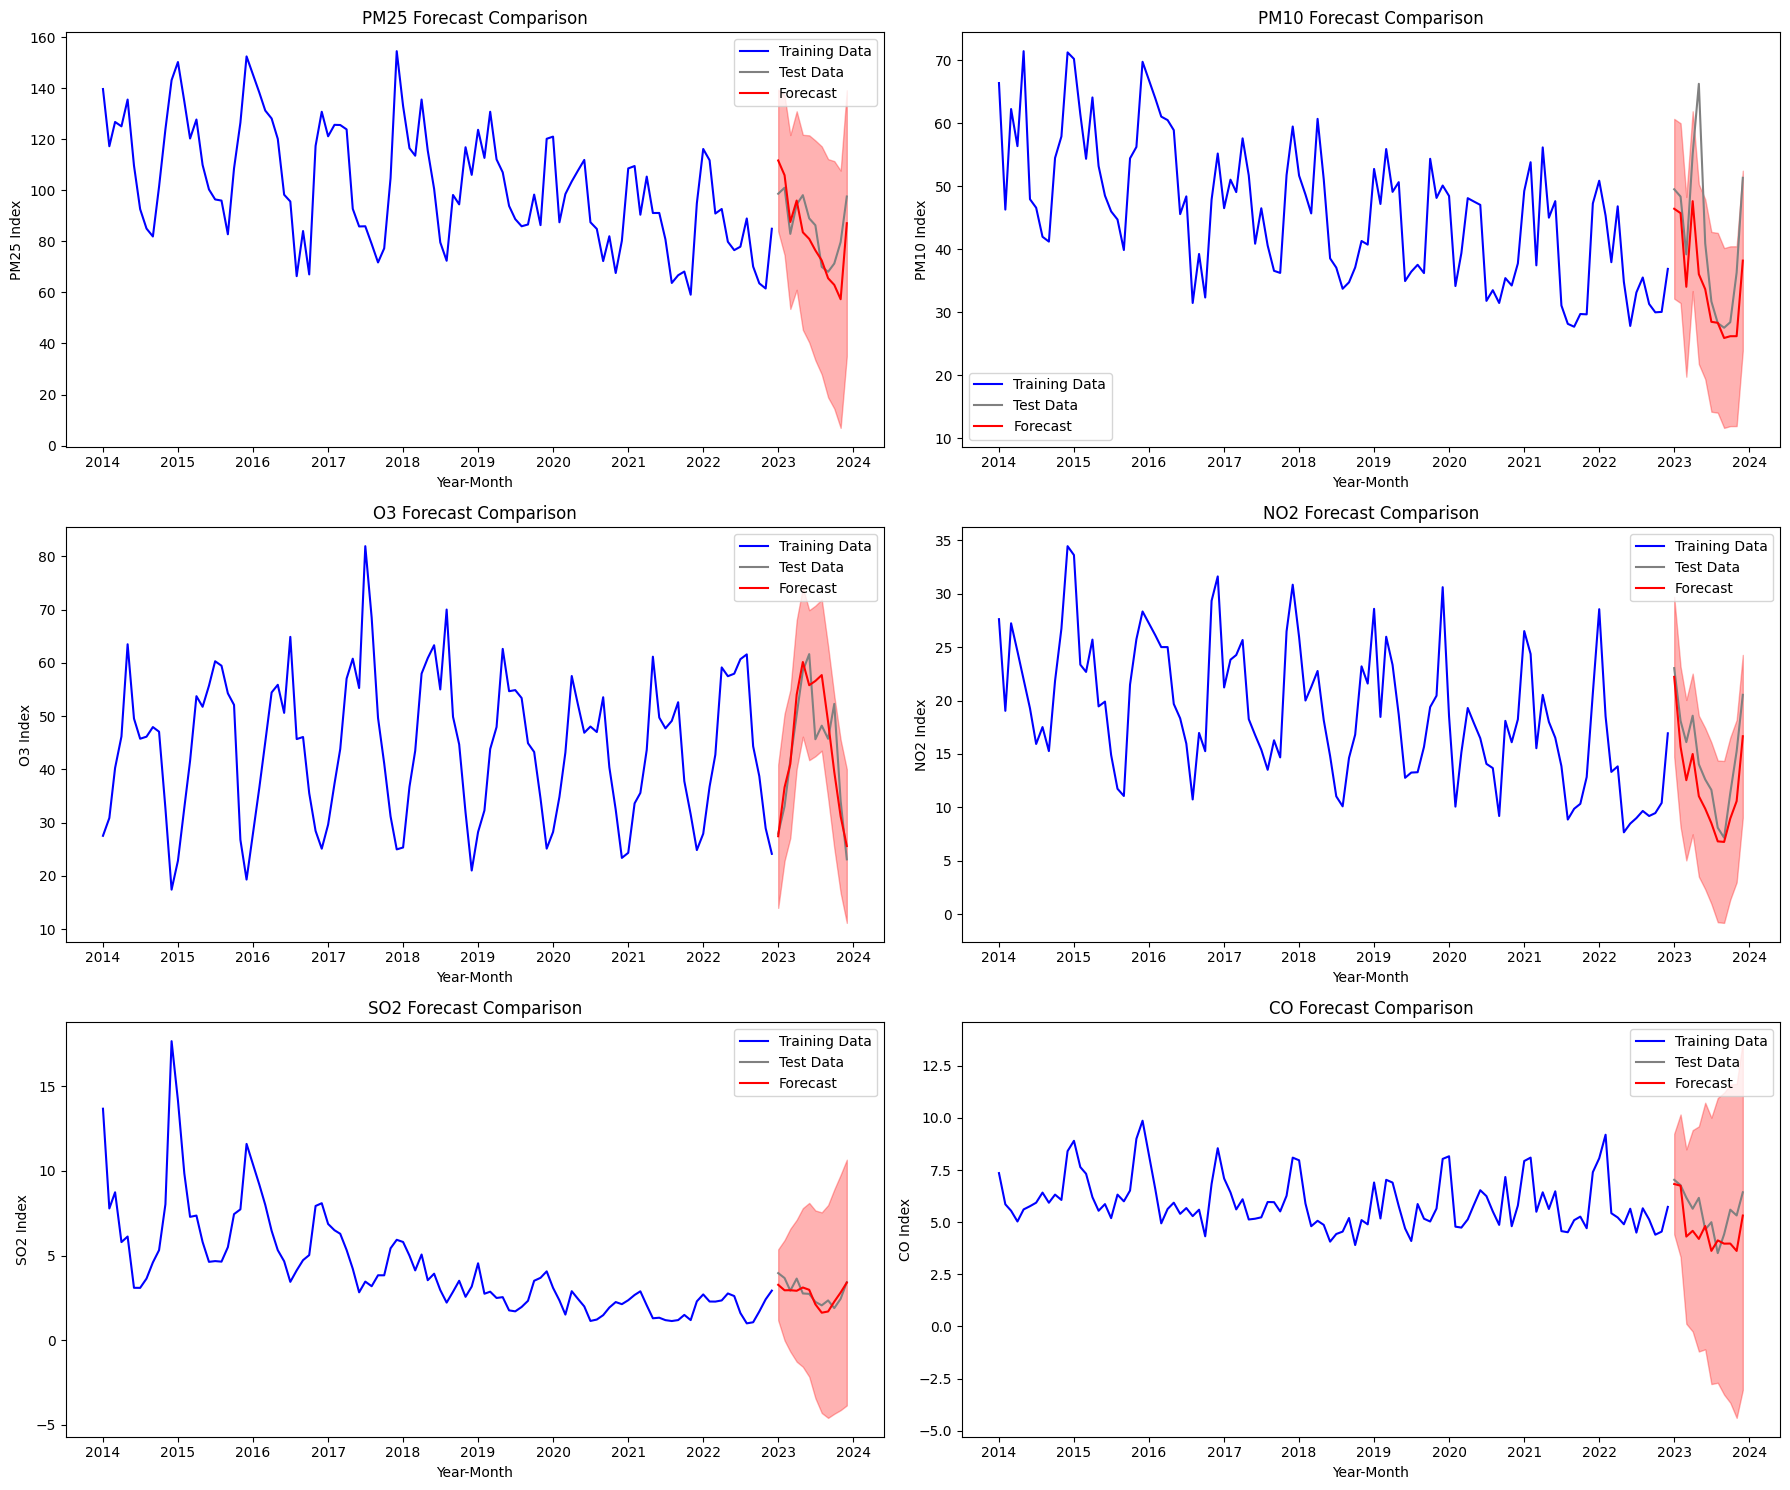

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 假设'monthly_avg_interpolated'已经加载且包含完整数据
# 假设数据集已经拆分为训练集和测试集
training_data = monthly_avg_interpolated[monthly_avg_interpolated['year_month'] <= '2022-12']
test_data = monthly_avg_interpolated[(monthly_avg_interpolated['year_month'] > '2022-12') & (monthly_avg_interpolated['year_month'] <= '2023-12') ]

# Models and their parameters based on earlier analysis
model_params = {
    'pm25': {'order': (3, 1, 0), 'seasonal_order': (1, 1, 0, 12)},
    'pm10': {'order': (0, 1, 1), 'seasonal_order': (1, 1, 0, 12)},
    'o3': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 0, 12)},
    'no2': {'order': (0, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    'so2': {'order': (0, 1, 0), 'seasonal_order': (0, 1, 1, 12)},
    'co': {'order': (0, 1, 0), 'seasonal_order': (1, 1, 1, 12)}
}

# 初始化存储预测结果和置信区间的字典
predictions = {}
confidence_intervals = {}

# 对每种污染物进行模型拟合和预测
for pollutant in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    model = SARIMAX(training_data[pollutant],
                    order=model_params[pollutant]['order'],
                    seasonal_order=model_params[pollutant]['seasonal_order'],
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    result = model.fit(disp=False)
    print(result.summary())
    # 为测试集期间进行预测
    forecast = result.get_forecast(steps=len(test_data))
    predictions[pollutant] = forecast.predicted_mean
    confidence_intervals[pollutant] = forecast.conf_int()

# 绘制每种污染物的图表
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

for i, pollutant in enumerate(['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']):
    ax = axes[i]
    ax.plot(training_data['year_month'], training_data[pollutant], label='Training Data', color='blue')
    ax.plot(test_data['year_month'], test_data[pollutant], label='Test Data', color='gray')
    ax.plot(test_data['year_month'], predictions[pollutant], label='Forecast', color='red')
    ax.fill_between(test_data['year_month'], 
                    confidence_intervals[pollutant].iloc[:, 0], 
                    confidence_intervals[pollutant].iloc[:, 1], color='red', alpha=0.3)
    ax.set_title(f'{pollutant.upper()} Forecast Comparison')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel(f'{pollutant.upper()} Index')
    ax.legend()
      # Adjust the x-ticks to show every third month for clarity

plt.tight_layout()
plt.savefig('pollutant_forecasts.png', dpi=300)
plt.show()


Residual Analysis for PM25:
Shapiro-Wilk Test for PM25:
Statistic: 0.9813771843910217, P-value: 0.1956818848848343



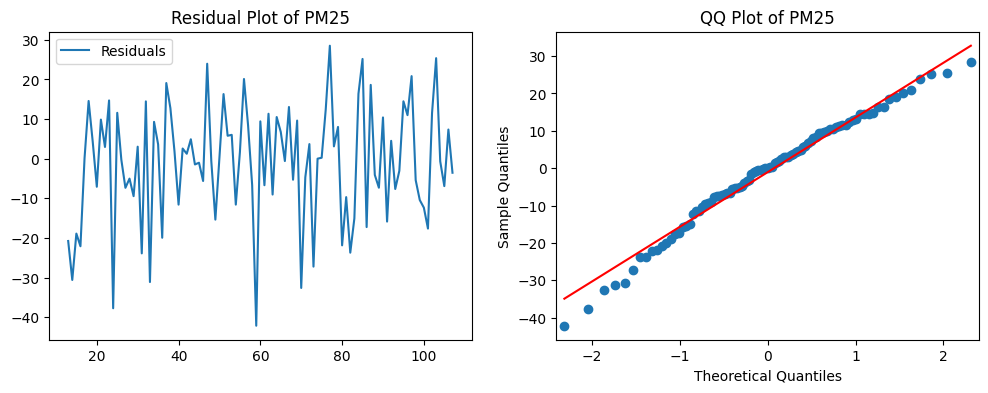

      lb_stat  lb_pvalue
24  22.426462   0.553829


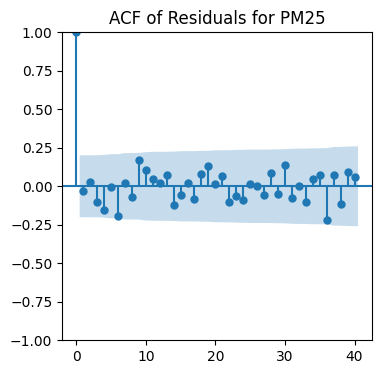

Residual Analysis for PM10:
Shapiro-Wilk Test for PM10:
Statistic: 0.9807020425796509, P-value: 0.1746554970741272



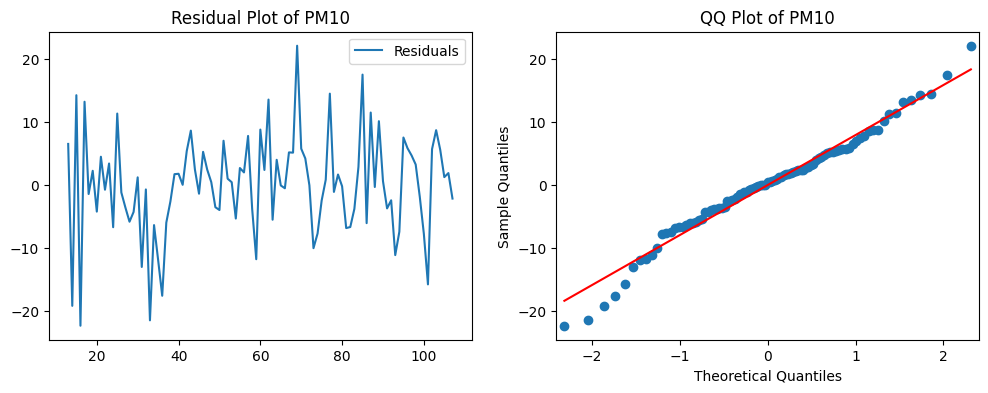

      lb_stat  lb_pvalue
24  30.140947   0.180124


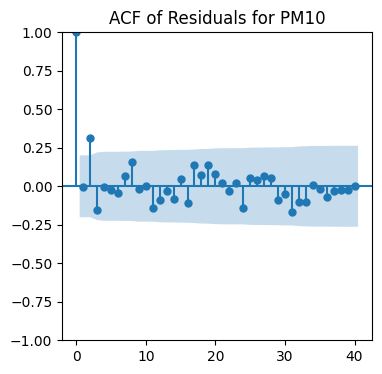

Residual Analysis for O3:
Shapiro-Wilk Test for O3:
Statistic: 0.9812937378883362, P-value: 0.19296003878116608



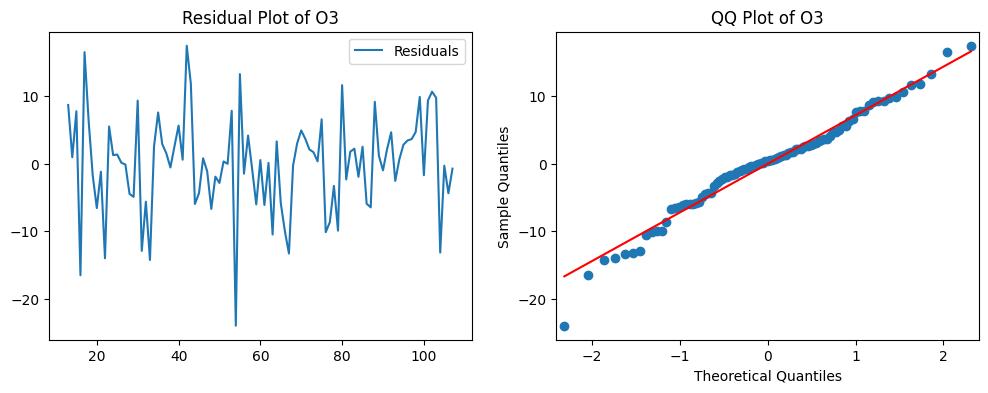

      lb_stat  lb_pvalue
24  20.477346   0.669332


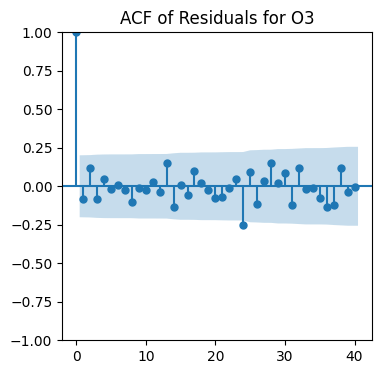

Residual Analysis for NO2:
Shapiro-Wilk Test for NO2:
Statistic: 0.9916839003562927, P-value: 0.8228437900543213



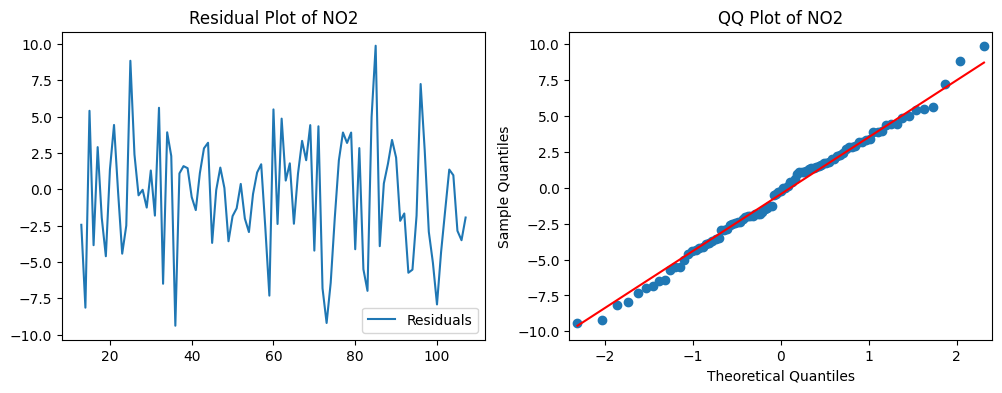

      lb_stat  lb_pvalue
24  17.071191    0.84561


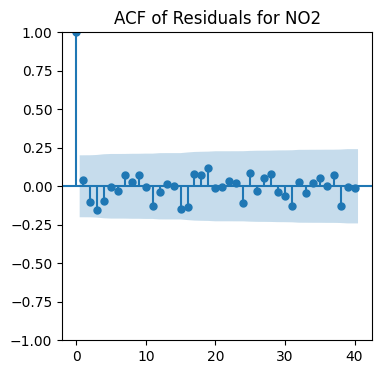

Residual Analysis for SO2:
Shapiro-Wilk Test for SO2:
Statistic: 0.9257804751396179, P-value: 4.5065535232424736e-05



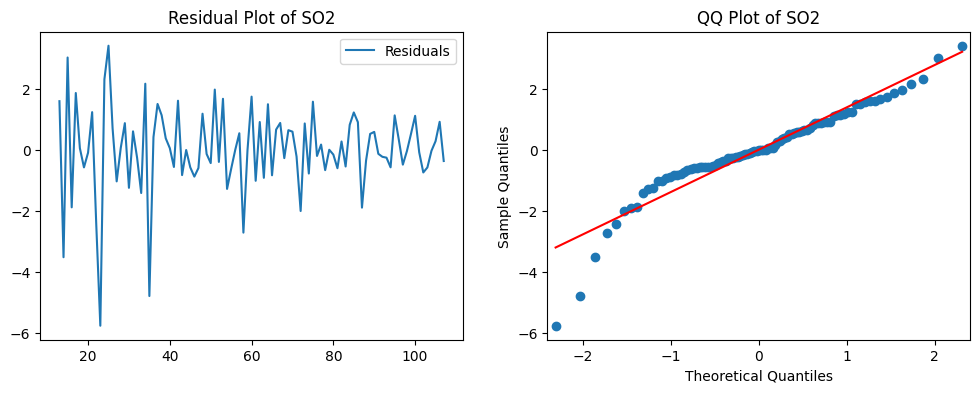

      lb_stat  lb_pvalue
24  22.033831   0.577247


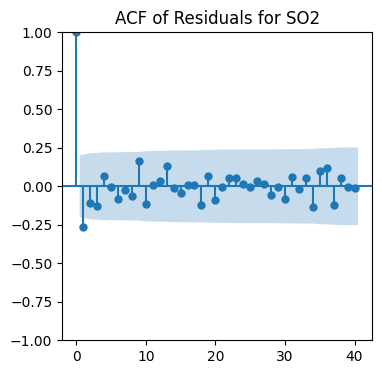

Residual Analysis for CO:
Shapiro-Wilk Test for CO:
Statistic: 0.9786659479141235, P-value: 0.12347050756216049



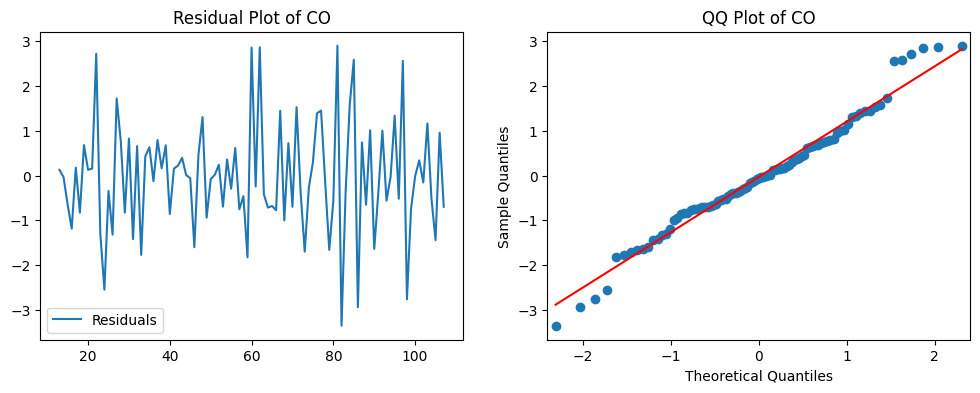

      lb_stat  lb_pvalue
24  22.883694   0.526673


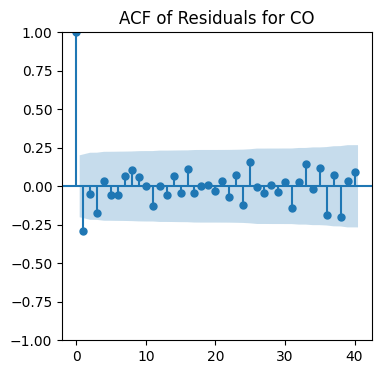

In [313]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pandas as pd

def residual_analysis(data, column, order, seasonal_order):
    # Fit the SARIMA model
    model = SARIMAX(data[column], order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit(disp=False)
    residuals = result.resid
    residuals = residuals[13:]
    
    # Shapiro-Wilk test for normality
    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test for {column.upper()}:\nStatistic: {shapiro_test.statistic}, P-value: {shapiro_test.pvalue}\n")

    # QQ plot and residuals plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].set_title(f'Residual Plot of {column.upper()}')
    ax[0].plot(residuals, label='Residuals')
    ax[0].legend()
    ax[1].set_title(f'QQ Plot of {column.upper()}')
    qqplot(residuals, line='s', ax=ax[1])  # line='s' adds a standardized line
    plt.savefig(f'residuals_{column.upper()}.png', dpi=300)
    plt.show()

    # ACF plot and Ljung-Box test for residuals
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    plot_acf(residuals, ax=ax, lags=40, title=f'ACF of Residuals for {column.upper()}')
    lb_test = acorr_ljungbox(residuals, lags=[24], return_df=True)
    print(lb_test)
    plt.savefig(f'residuals_adf_{column.upper()}.png', dpi=300)
    plt.show()

    return residuals.describe(), lb_test

# Assume 'training_data' is your DataFrame containing the training data
residual_stats = {}
for pollutant, params in model_params.items():
    print(f"Residual Analysis for {pollutant.upper()}:")
    residual_stats[pollutant] = residual_analysis(training_data, pollutant, params['order'], params['seasonal_order'])